In [1]:
!pip3 install --quiet matplotlib numpy pandas scikit-learn seaborn plotly preprocessing

# Exploratory Data Analysis (EDA)

In [2]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os

In [3]:
# Changing the path to the root of the repository

if not os.path.exists('data'):
    current_path = os.getcwd()
    root_path = os.path.abspath(os.path.join(current_path, '..'))
    os.chdir(root_path)
    print(f'Changed working directory to: {os.getcwd()}')

Changed working directory to: /Users/thiagonarcizo/Code/EI-ST4/Forecast-of-Electricity-Consumption


In [4]:
!pip3 install --quiet -e .

In [5]:
# ============================================================================
# UTILITY FUNCTIONS
from src.data_loader import *
# ============================================================================

# Global constants
DAY_ORDER = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
SEASON_ORDER = ['Winter', 'Spring', 'Summer', 'Fall']

In [6]:
# Load all data using utility function

data = load_all_data()

# Extract individual datasets for backward compatibility
acorn_details = data['acorn_details']
temperatures = data['temperatures']
uk_bank_holidays = data['uk_bank_holidays']
weather_daily = data['weather_daily']
weather_hourly = data['weather_hourly']
group_4_daily_predict = data['group_4_daily_predict']
group_4_half_hourly_predict = data['group_4_half_hourly_predict']
group_4_daily = data['group_4_daily']
group_4_half_hourly = data['group_4_half_hourly']

In [7]:
# Update individual variables
temperatures = data['temperatures']
uk_bank_holidays = data['uk_bank_holidays']
weather_daily = data['weather_daily']

# Conso by Acorn - Hourly

## Different Granularities

/Users/thiagonarcizo/Code/EI-ST4/Forecast-of-Electricity-Consumption/src/data_loader.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Acorn', y=y_col, data=data, palette='Set2')


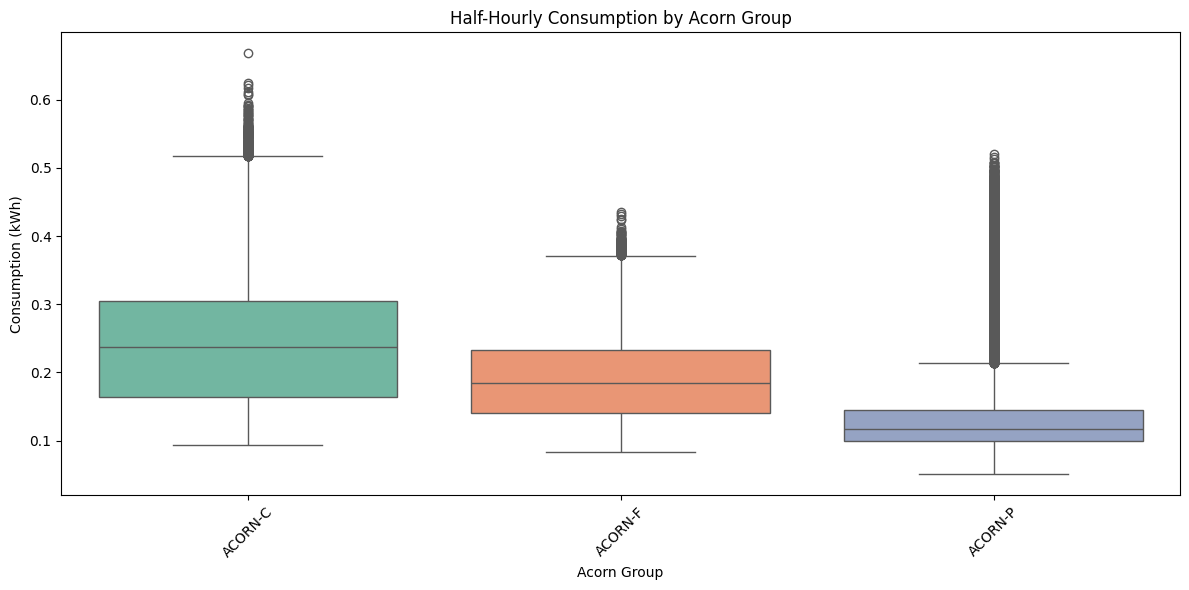

In [8]:
# Conso by Acorn group (half-hourly)
# Copying
group_4_half_hourly = group_4_half_hourly.copy()
group_4_half_hourly['Acorn'] = group_4_half_hourly['Acorn'].astype('category')

# Prepare data with temporal features
group_4_half_hourly = add_temporal_features(group_4_half_hourly)

# Create boxplot using utility function
create_boxplot_by_acorn(group_4_half_hourly, title_prefix='Half-Hourly')

# Get Acorn groups for later use
acorn_groups = group_4_half_hourly['Acorn'].unique()

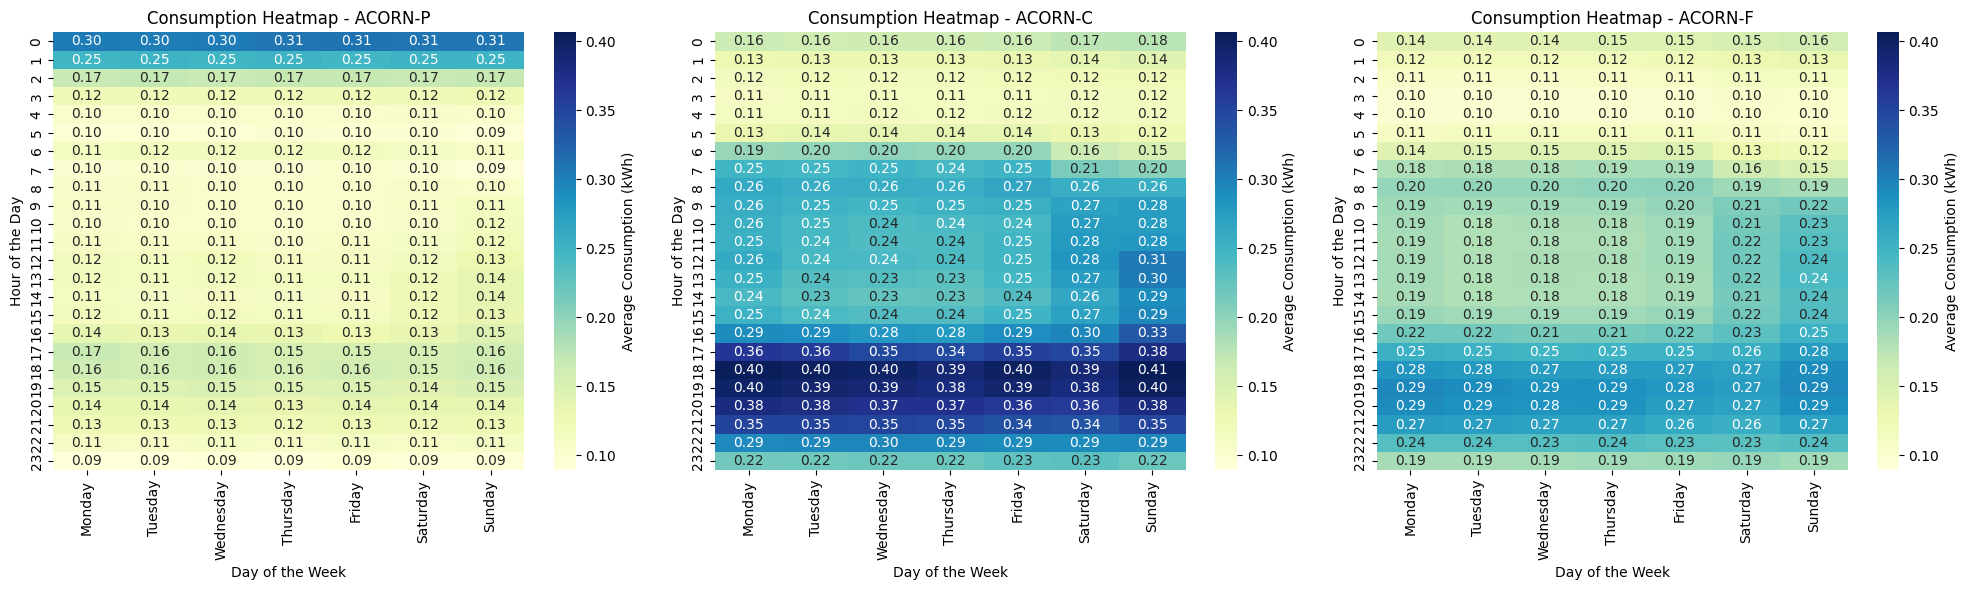

In [9]:
# Create separate heatmaps for each Acorn group
acorn_groups = group_4_half_hourly['Acorn'].unique()

# Define the correct order for days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Extract hour and day from DateTime
group_4_half_hourly['Hour'] = group_4_half_hourly['DateTime'].dt.hour
group_4_half_hourly['Day'] = group_4_half_hourly['DateTime'].dt.day_name()

# Create heatmaps using utility function
create_heatmap_by_acorn(group_4_half_hourly, acorn_groups, day_order)

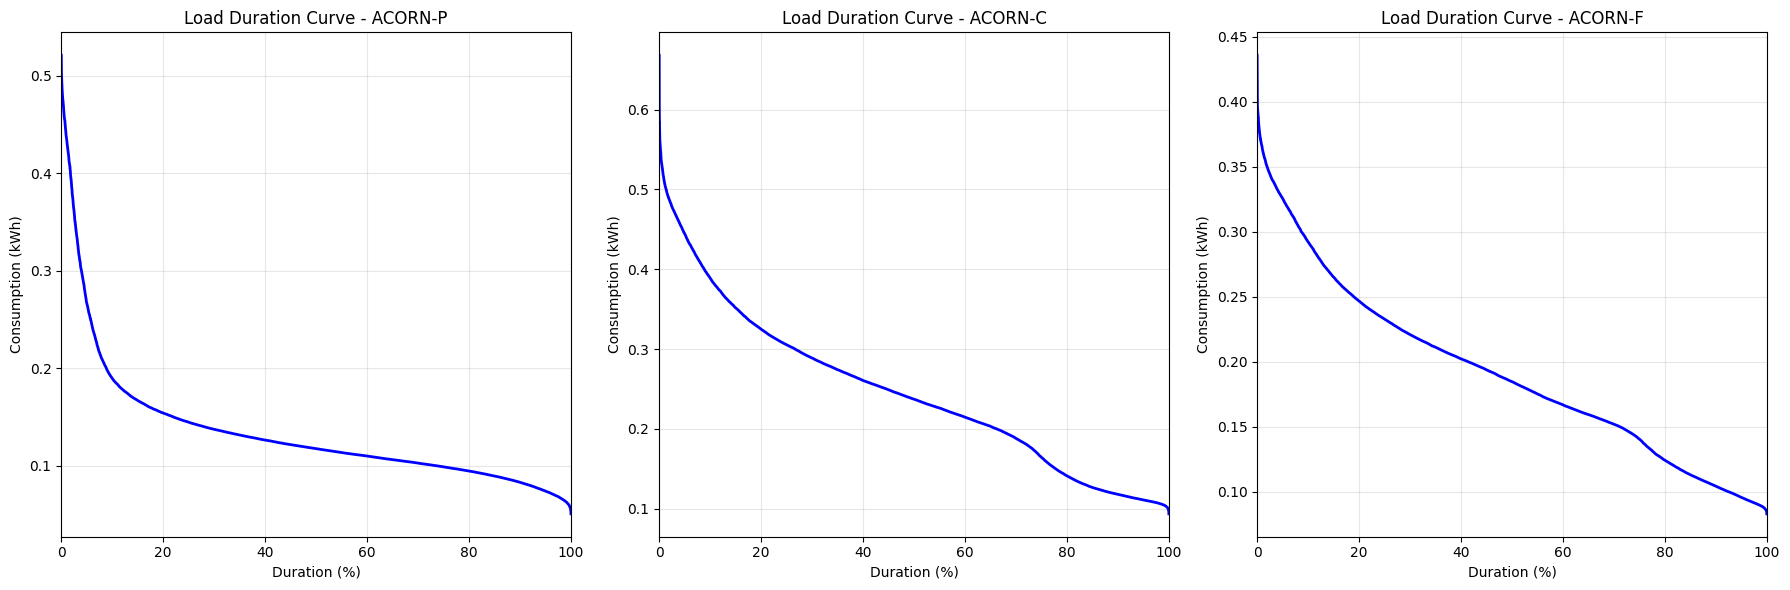

In [10]:
# Load Duration Curves
create_load_duration_curves(group_4_half_hourly, acorn_groups)

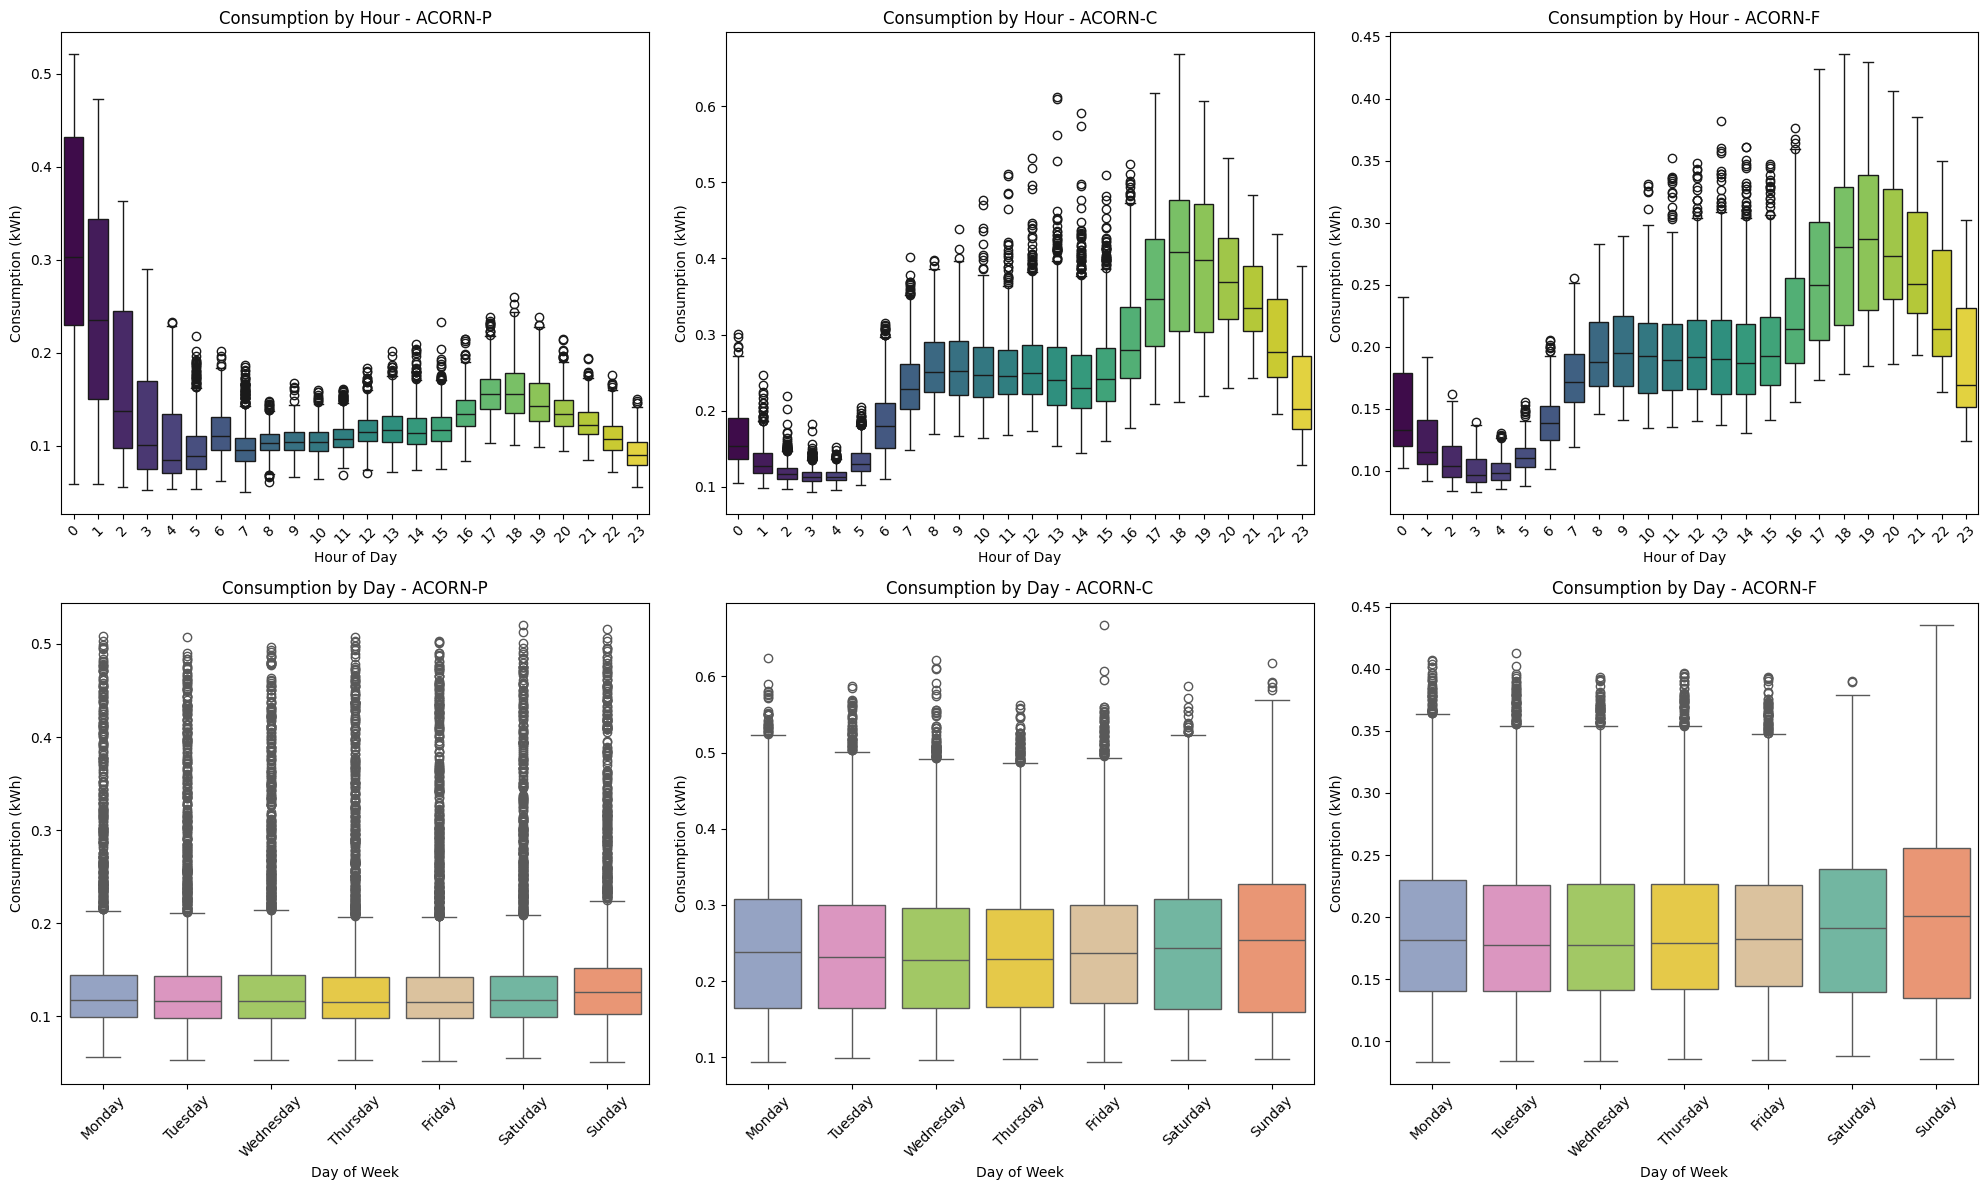

In [11]:
# Boxplots of hour of day/day of week consumption for each Acorn group
create_temporal_boxplots(group_4_half_hourly, acorn_groups, DAY_ORDER)

## Seasonality and Events

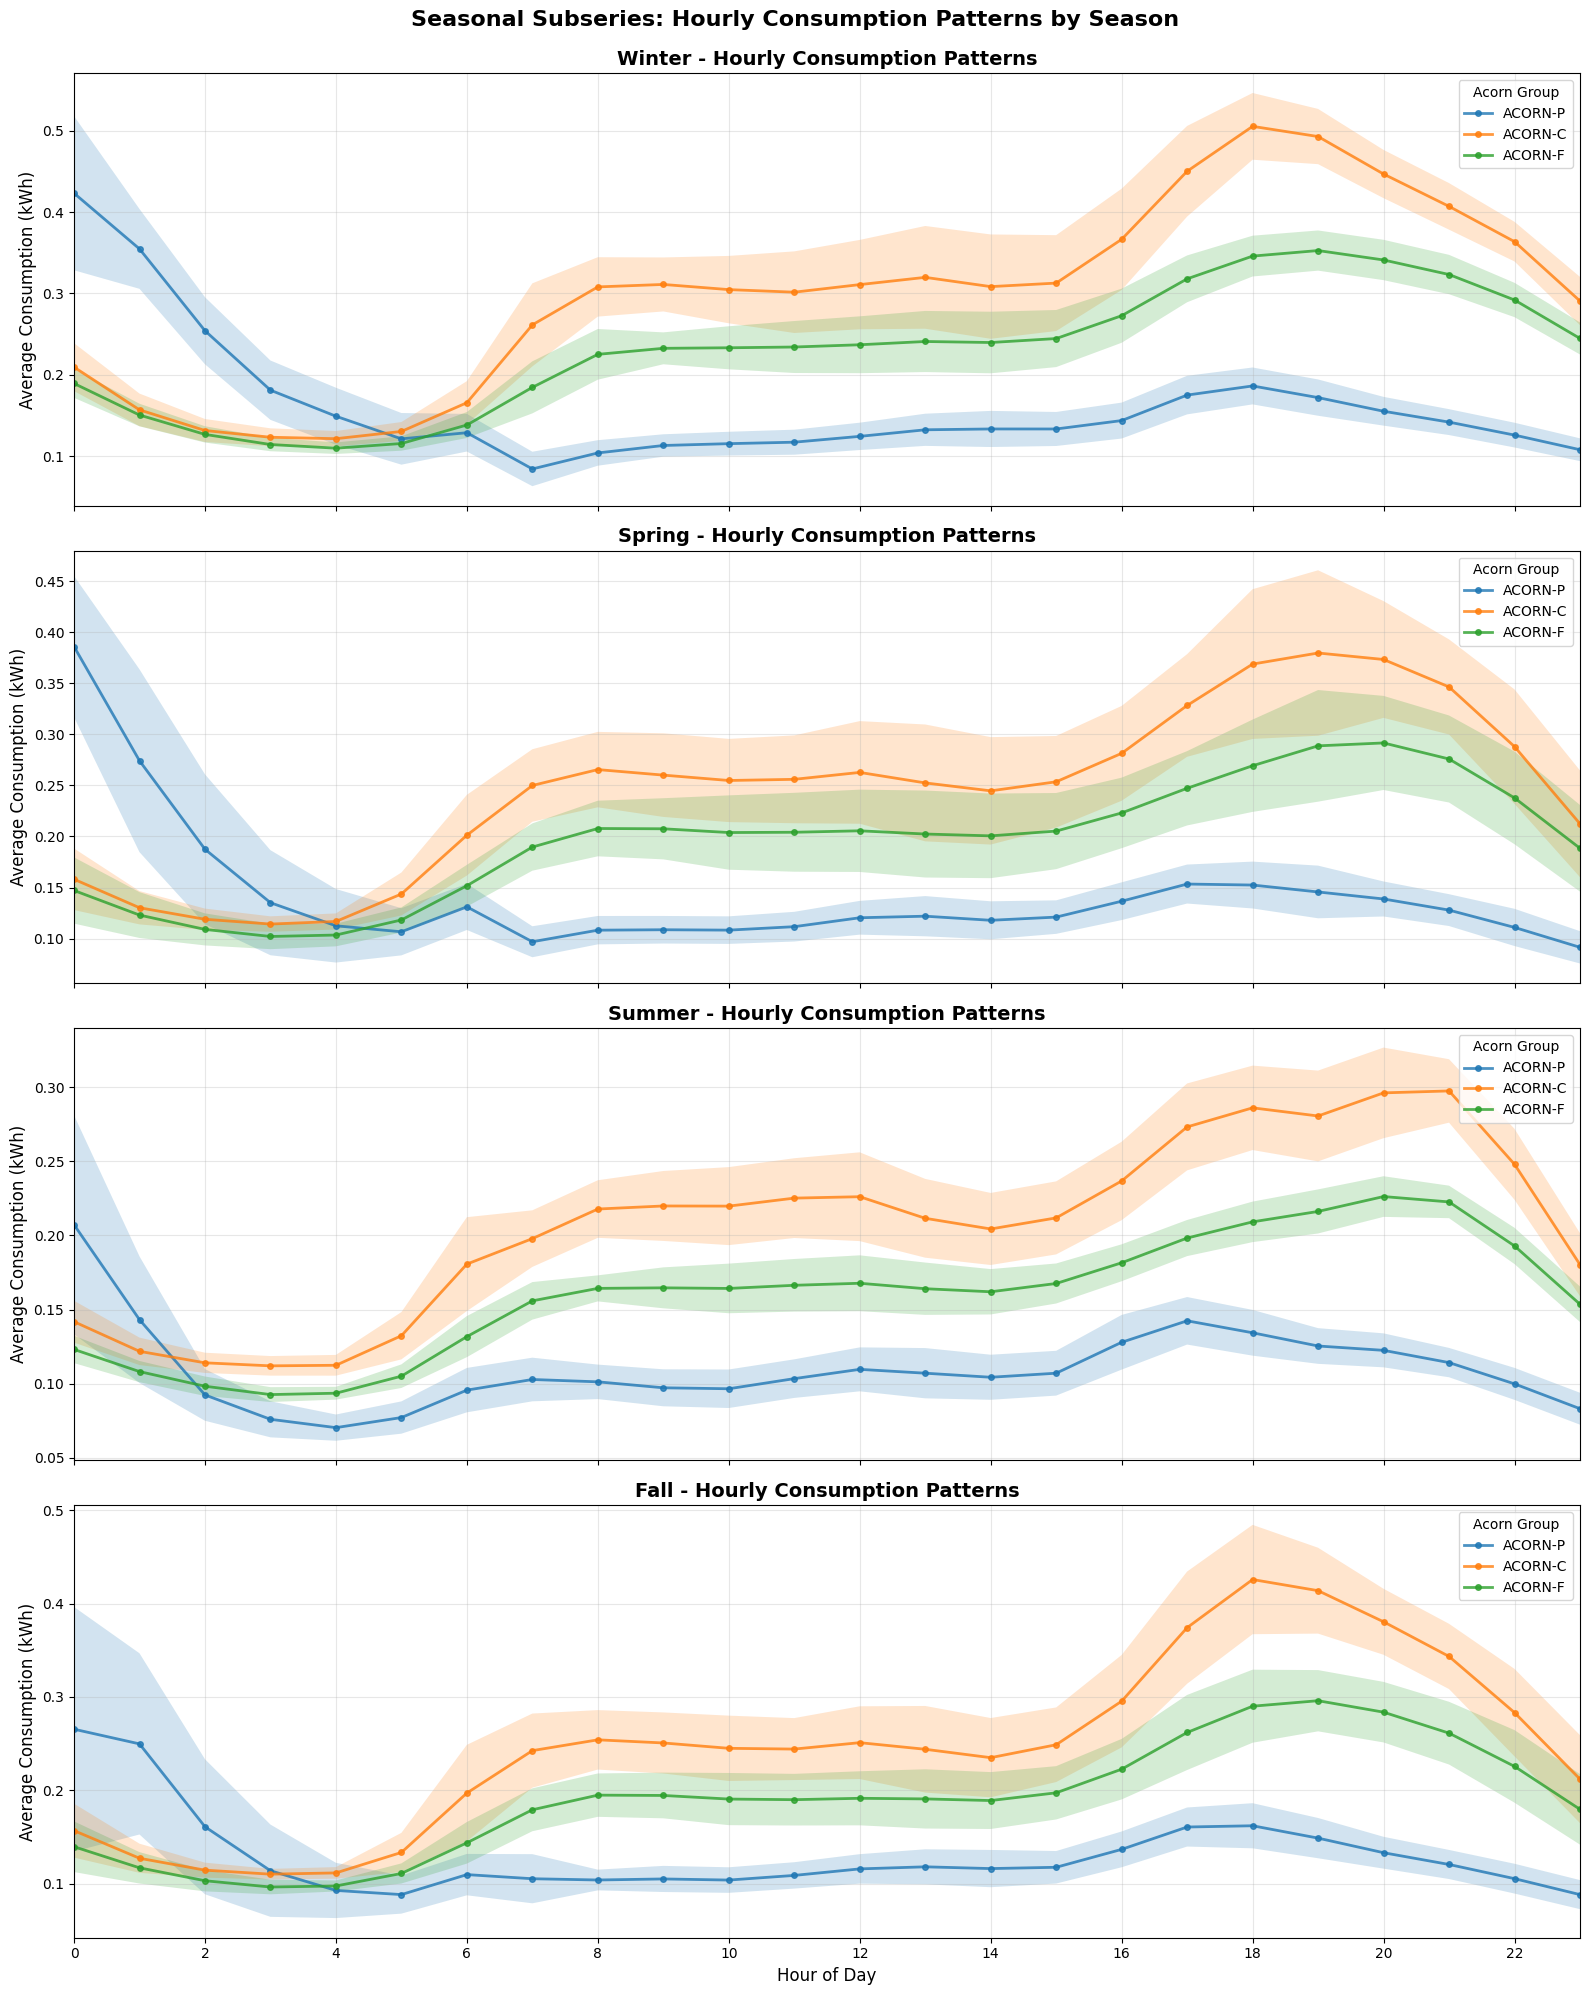


=== SEASONAL SUBSERIES ANALYSIS ===
Peak hours and consumption levels by season and Acorn group:

--- WINTER ---
ACORN-P: Peak at 00:00 (0.423 kWh), Min at 07:00 (0.085 kWh)
ACORN-C: Peak at 18:00 (0.505 kWh), Min at 04:00 (0.122 kWh)
ACORN-F: Peak at 19:00 (0.353 kWh), Min at 04:00 (0.110 kWh)

--- SPRING ---
ACORN-P: Peak at 00:00 (0.386 kWh), Min at 23:00 (0.091 kWh)
ACORN-C: Peak at 19:00 (0.380 kWh), Min at 03:00 (0.114 kWh)
ACORN-F: Peak at 20:00 (0.292 kWh), Min at 03:00 (0.102 kWh)

--- SUMMER ---
ACORN-P: Peak at 00:00 (0.207 kWh), Min at 04:00 (0.070 kWh)
ACORN-C: Peak at 21:00 (0.297 kWh), Min at 03:00 (0.112 kWh)
ACORN-F: Peak at 20:00 (0.226 kWh), Min at 03:00 (0.093 kWh)

--- FALL ---
ACORN-P: Peak at 00:00 (0.265 kWh), Min at 23:00 (0.088 kWh)
ACORN-C: Peak at 18:00 (0.426 kWh), Min at 03:00 (0.110 kWh)
ACORN-F: Peak at 19:00 (0.296 kWh), Min at 03:00 (0.096 kWh)


In [12]:
# Seasonal subseries plot - showing hourly patterns within each season

# Create seasonal analysis using utility function
create_seasonal_analysis(group_4_half_hourly, acorn_groups, SEASON_ORDER)

# Print seasonal summary using utility function
print_seasonal_summary(group_4_half_hourly, acorn_groups, SEASON_ORDER)

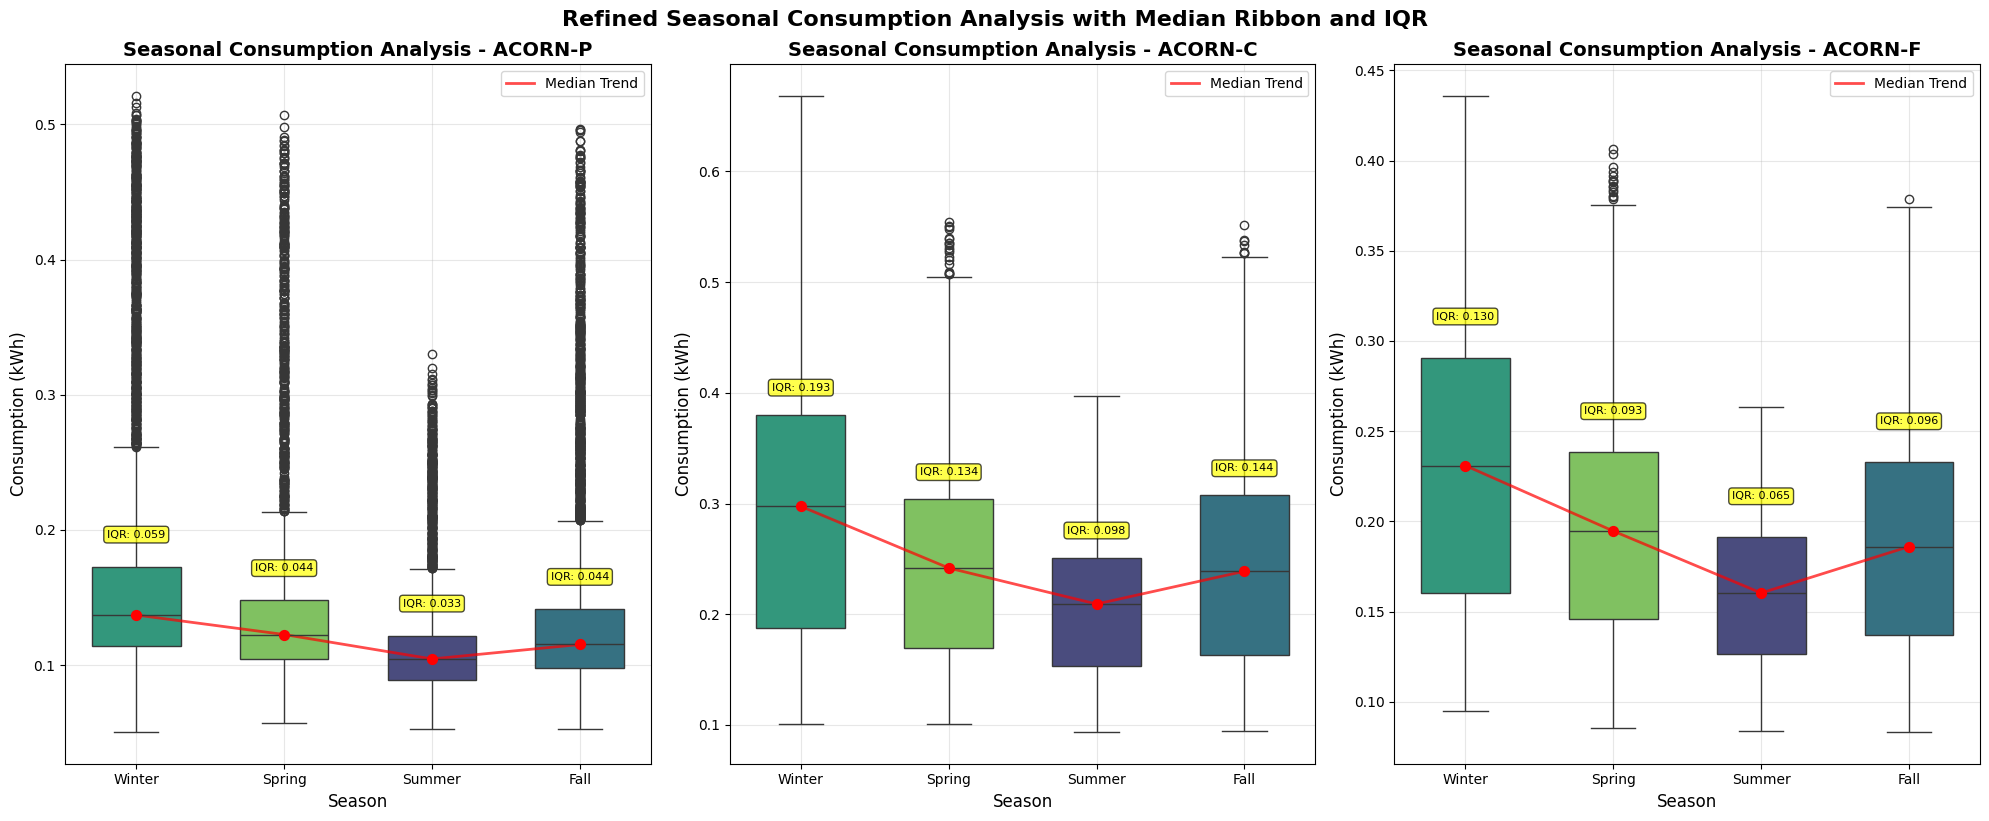


=== SEASONAL CONSUMPTION STATISTICS ===

Summary by Acorn Group and Season:

--- ACORN-P ---
        Count    Mean  Median     Std      Q1      Q3     IQR
Season                                                       
Fall     8736  0.1303  0.1153  0.0604  0.0978  0.1416  0.0438
Spring   4416  0.1419  0.1227  0.0713  0.1044  0.1481  0.0437
Summer   7396  0.1100  0.1046  0.0354  0.0887  0.1218  0.0331
Winter   6384  0.1617  0.1371  0.0831  0.1140  0.1728  0.0588

--- ACORN-C ---
        Count    Mean  Median     Std      Q1      Q3     IQR
Season                                                       
Fall     8736  0.2456  0.2389  0.0994  0.1631  0.3074  0.1443
Spring   4416  0.2442  0.2418  0.0924  0.1695  0.3039  0.1344
Summer   7396  0.2062  0.2092  0.0626  0.1533  0.2511  0.0978
Winter   6384  0.2959  0.2975  0.1209  0.1873  0.3802  0.1929

--- ACORN-F ---
        Count    Mean  Median     Std      Q1      Q3     IQR
Season                                                       
Fall

In [13]:
# Refined boxplots by season with median ribbon and interquartile range

# First, add season column to the data
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:  # months 9, 10, 11
        return 'Fall'

# Add season column
group_4_half_hourly['Season'] = group_4_half_hourly['DateTime'].dt.month.apply(get_season)

# Define season order for plotting
SEASON_ORDER = ['Winter', 'Spring', 'Summer', 'Fall']

# Create refined boxplots by season for each Acorn group
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

for idx, acorn_group in enumerate(acorn_groups):
    acorn_data = group_4_half_hourly[group_4_half_hourly['Acorn'] == acorn_group]
    
    # Create boxplot with enhanced styling
    box_plot = sns.boxplot(x='Season', y='Conso_moy', data=acorn_data, 
                          order=SEASON_ORDER, ax=axes[idx], 
                          hue='Season', palette='viridis', width=0.6, legend=False)
    
    # Calculate statistics for each season
    season_stats = []
    for season in SEASON_ORDER:
        season_data = acorn_data[acorn_data['Season'] == season]['Conso_moy']
        if len(season_data) > 0:
            q1 = season_data.quantile(0.25)
            q3 = season_data.quantile(0.75)
            median = season_data.median()
            season_stats.append({'season': season, 'q1': q1, 'q3': q3, 'median': median})
    
    # Add median ribbon (connecting medians)
    if len(season_stats) > 1:
        x_positions = range(len(SEASON_ORDER))
        medians = [stat['median'] for stat in season_stats]
        axes[idx].plot(x_positions, medians, 'r-', linewidth=2, alpha=0.7, label='Median Trend')
        axes[idx].scatter(x_positions, medians, color='red', s=50, zorder=5)
    
    # Add interquartile range ribbons
    for i, stat in enumerate(season_stats):
        # Add subtle fill between Q1 and Q3
        axes[idx].fill_between([i-0.3, i+0.3], [stat['q1'], stat['q1']], 
                              [stat['q3'], stat['q3']], alpha=0.2, color='lightblue')
    
    # Customize the plot
    axes[idx].set_title(f'Seasonal Consumption Analysis - {acorn_group}', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Season', fontsize=12)
    axes[idx].set_ylabel('Consumption (kWh)', fontsize=12)
    axes[idx].grid(True, alpha=0.3)
    axes[idx].legend()
    
    # Add statistical annotations
    for i, stat in enumerate(season_stats):
        # Add text with IQR information
        iqr = stat['q3'] - stat['q1']
        axes[idx].text(i, stat['q3'] + 0.02, f'IQR: {iqr:.3f}', 
                      ha='center', va='bottom', fontsize=8, 
                      bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.suptitle('Refined Seasonal Consumption Analysis with Median Ribbon and IQR', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Print summary statistics by season
print("\n=== SEASONAL CONSUMPTION STATISTICS ===")
print("\nSummary by Acorn Group and Season:")
for acorn_group in acorn_groups:
    print(f"\n--- {acorn_group} ---")
    acorn_data = group_4_half_hourly[group_4_half_hourly['Acorn'] == acorn_group]
    seasonal_summary = acorn_data.groupby('Season')['Conso_moy'].agg([
        'count', 'mean', 'median', 'std', 
        lambda x: x.quantile(0.25), 
        lambda x: x.quantile(0.75)
    ]).round(4)
    seasonal_summary.columns = ['Count', 'Mean', 'Median', 'Std', 'Q1', 'Q3']
    seasonal_summary['IQR'] = (seasonal_summary['Q3'] - seasonal_summary['Q1']).round(4)
    print(seasonal_summary)

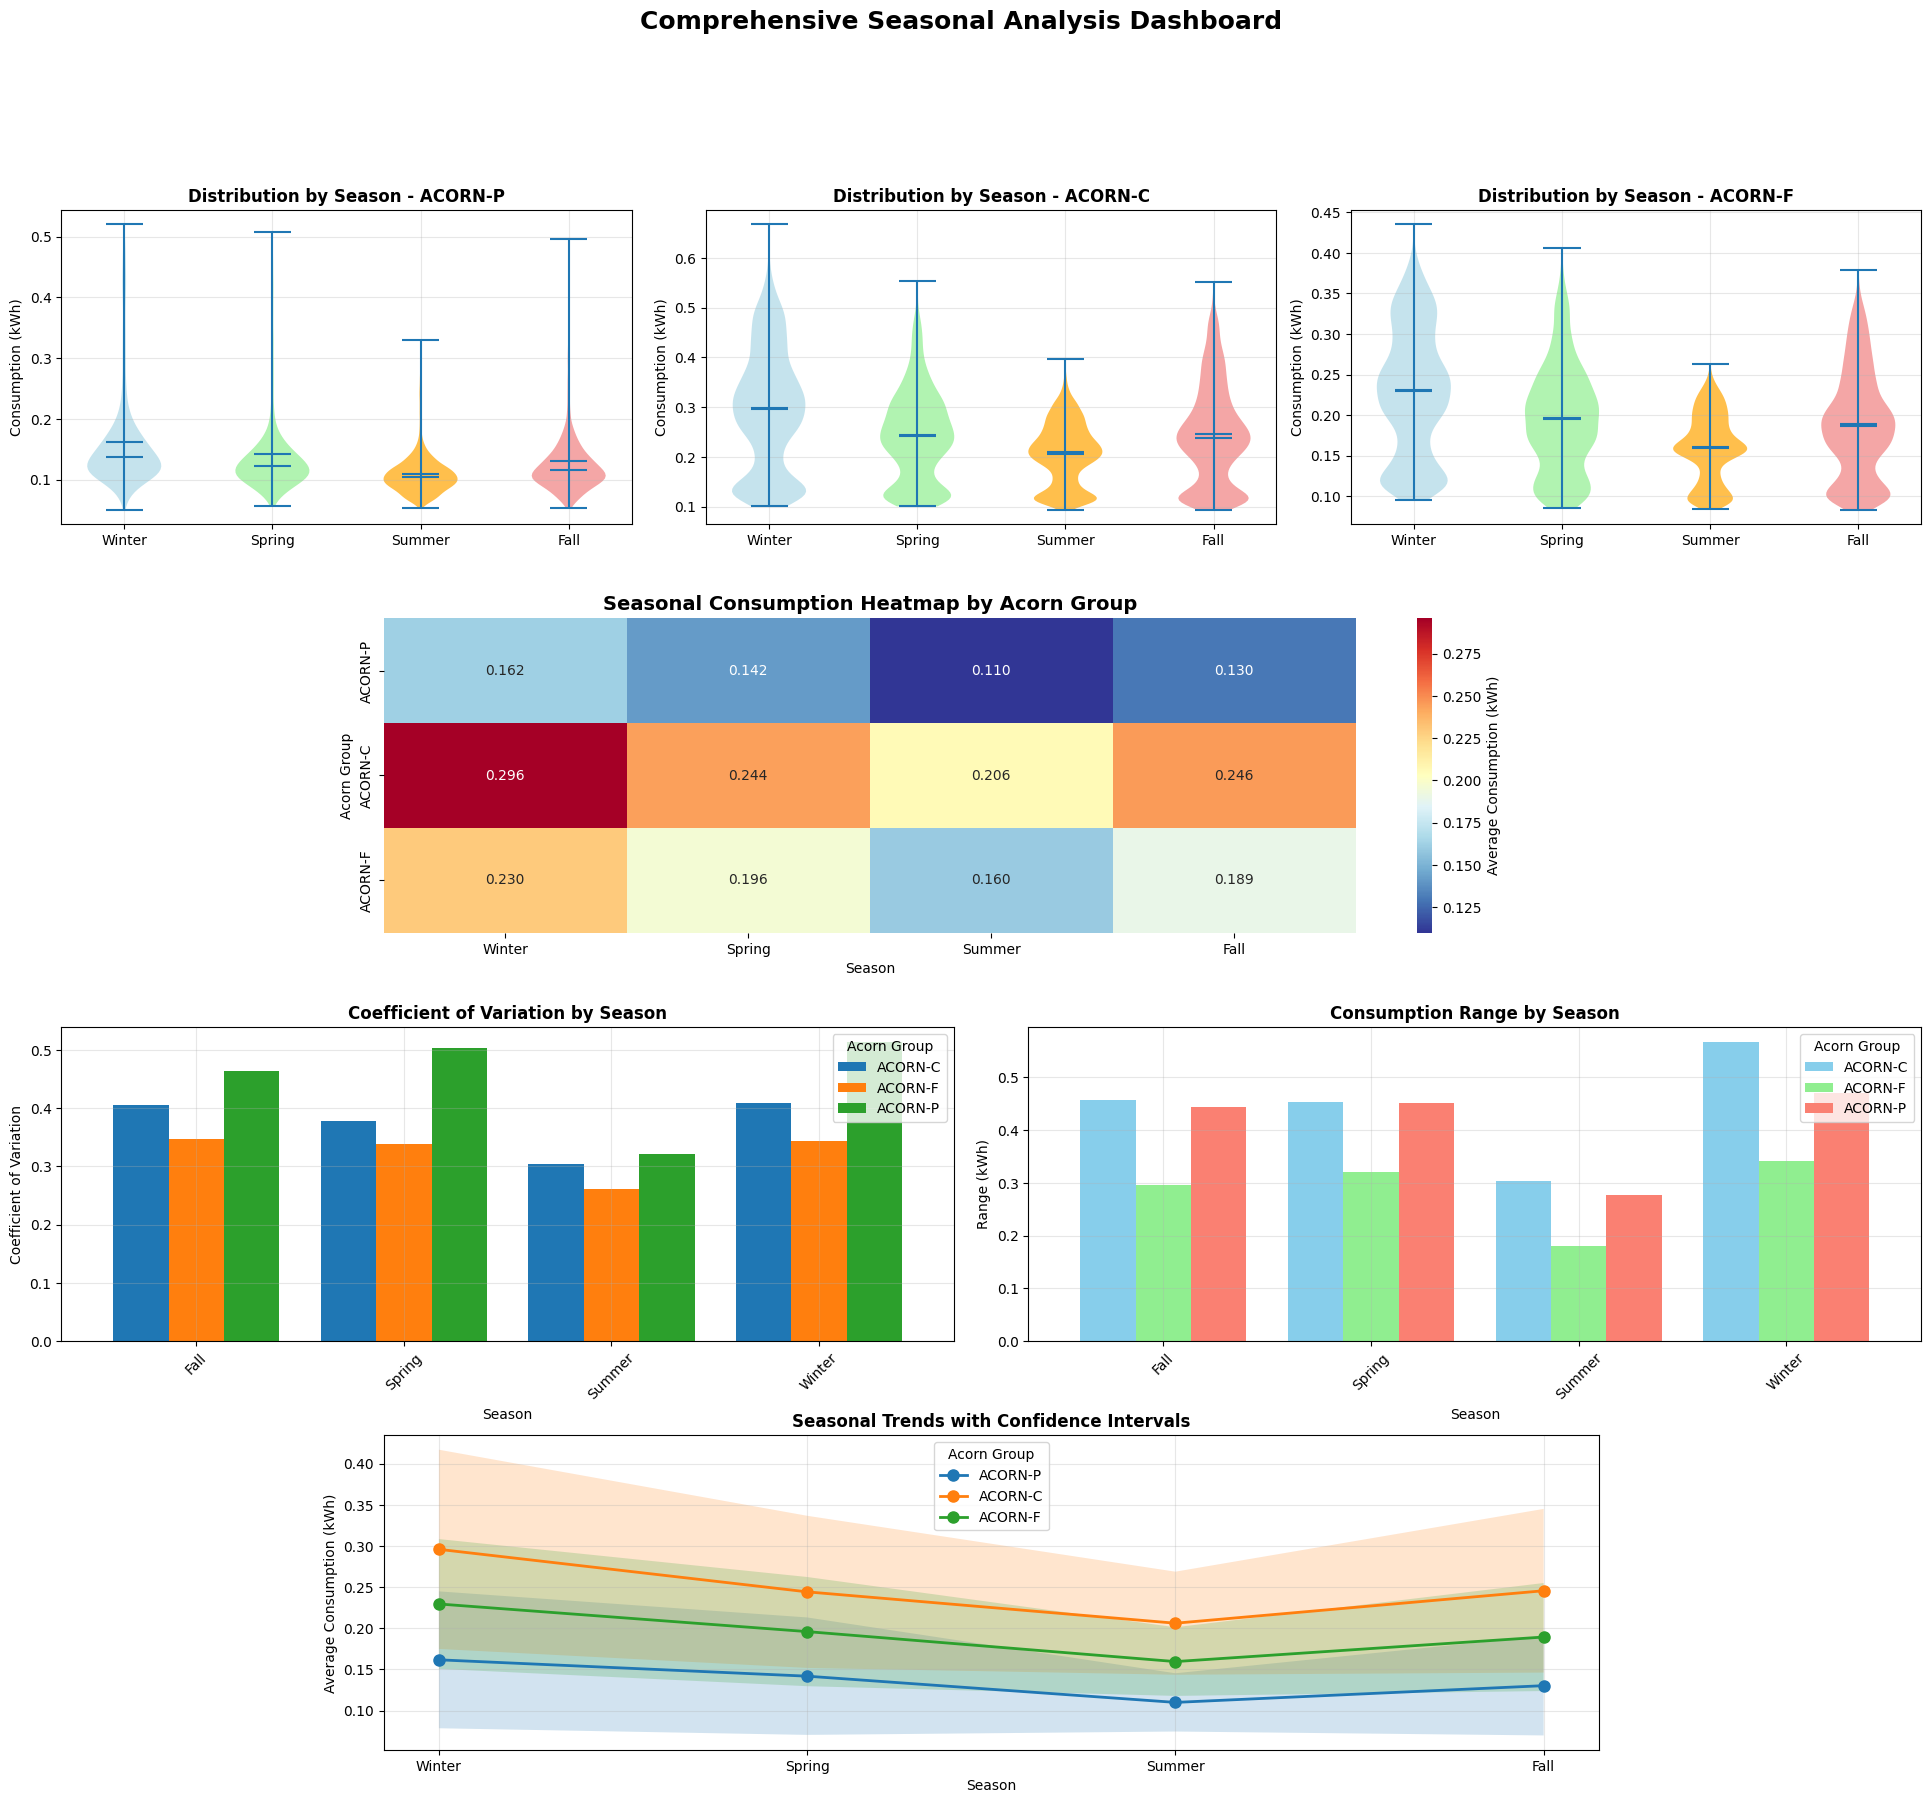


=== DETAILED SEASONAL ANALYSIS ===

Data period: 2012-06-30 22:00:00 to 2014-01-12 23:30:00
Total observations: 80,796

Seasonal distribution of observations:
Season
Fall      26208
Spring    13248
Summer    22188
Winter    19152
Name: count, dtype: int64

Seasonal variability analysis:

--- ACORN-P Seasonal Analysis ---
        Count    Mean  Median     Std     Min     Max      Q1      Q3     IQR  \
Season                                                                          
Fall     8736  0.1303  0.1153  0.0604  0.0527  0.4967  0.0978  0.1416  0.0438   
Spring   4416  0.1419  0.1227  0.0713  0.0570  0.5071  0.1044  0.1481  0.0437   
Summer   7396  0.1100  0.1046  0.0354  0.0531  0.3300  0.0887  0.1218  0.0331   
Winter   6384  0.1617  0.1371  0.0831  0.0506  0.5209  0.1140  0.1728  0.0588   

            CV   Range  
Season                  
Fall    0.4635  0.4440  
Spring  0.5025  0.4501  
Summer  0.3218  0.2769  
Winter  0.5139  0.4703  

--- ACORN-C Seasonal Analysis ---
    

In [14]:
# Advanced seasonal analysis with violin plots and distribution comparison

# Create a comprehensive seasonal analysis dashboard
fig = plt.figure(figsize=(24, 20))

# Create a grid layout - 4 rows, 6 columns for better centering
gs = fig.add_gridspec(4, 6, hspace=0.3, wspace=0.3)

# 1. Violin plots for each Acorn group (top row) - centered
for idx, acorn_group in enumerate(acorn_groups):
    # Distribute the 3 plots evenly in 6 columns: 0:2, 2:4, 4:6 (2 columns each)
    if idx == 0:
        ax = fig.add_subplot(gs[0, 0:2])
    elif idx == 1:
        ax = fig.add_subplot(gs[0, 2:4])
    else:  # idx == 2
        ax = fig.add_subplot(gs[0, 4:6])
    
    acorn_data = group_4_half_hourly[group_4_half_hourly['Acorn'] == acorn_group]
    
    # Create violin plot
    parts = ax.violinplot([acorn_data[acorn_data['Season'] == season]['Conso_moy'].values 
                          for season in SEASON_ORDER], 
                         positions=range(len(SEASON_ORDER)), 
                         showmeans=True, showmedians=True, showextrema=True)
    
    # Customize violin plot colors
    colors = ['lightblue', 'lightgreen', 'orange', 'lightcoral']
    for pc, color in zip(parts['bodies'], colors):
        pc.set_facecolor(color)
        pc.set_alpha(0.7)
    
    ax.set_xticks(range(len(SEASON_ORDER)))
    ax.set_xticklabels(SEASON_ORDER)
    ax.set_title(f'Distribution by Season - {acorn_group}', fontweight='bold')
    ax.set_ylabel('Consumption (kWh)')
    ax.grid(True, alpha=0.3)

# 2. Seasonal comparison heatmap (second row, spanning all columns) - centered
ax_heatmap = fig.add_subplot(gs[1, 1:5])  # Center the heatmap by using columns 1-4

# Create seasonal comparison matrix
seasonal_comparison = []
for acorn_group in acorn_groups:
    acorn_data = group_4_half_hourly[group_4_half_hourly['Acorn'] == acorn_group]
    row = []
    for season in SEASON_ORDER:
        mean_consumption = acorn_data[acorn_data['Season'] == season]['Conso_moy'].mean()
        row.append(mean_consumption)
    seasonal_comparison.append(row)

seasonal_df = pd.DataFrame(seasonal_comparison, 
                          index=acorn_groups, 
                          columns=SEASON_ORDER)

# Create heatmap
sns.heatmap(seasonal_df, annot=True, fmt='.3f', cmap='RdYlBu_r', 
           ax=ax_heatmap, cbar_kws={'label': 'Average Consumption (kWh)'})
ax_heatmap.set_title('Seasonal Consumption Heatmap by Acorn Group', 
                    fontsize=14, fontweight='bold')
ax_heatmap.set_xlabel('Season')
ax_heatmap.set_ylabel('Acorn Group')

# 3. Statistical comparison (third row)
# Coefficient of Variation by season
ax_cv = fig.add_subplot(gs[2, 0:3])  # Span first three columns
cv_data = []
for season in SEASON_ORDER:
    season_data = group_4_half_hourly[group_4_half_hourly['Season'] == season]
    for acorn_group in acorn_groups:
        acorn_season_data = season_data[season_data['Acorn'] == acorn_group]['Conso_moy']
        if len(acorn_season_data) > 0:
            cv = acorn_season_data.std() / acorn_season_data.mean()
            cv_data.append({'Season': season, 'Acorn': acorn_group, 'CV': cv})

cv_df = pd.DataFrame(cv_data)
cv_pivot = cv_df.pivot(index='Season', columns='Acorn', values='CV')
cv_pivot.plot(kind='bar', ax=ax_cv, width=0.8)
ax_cv.set_title('Coefficient of Variation by Season', fontweight='bold')
ax_cv.set_ylabel('Coefficient of Variation')
ax_cv.tick_params(axis='x', rotation=45)
ax_cv.legend(title='Acorn Group')
ax_cv.grid(True, alpha=0.3)

# Range analysis by season
ax_range = fig.add_subplot(gs[2, 3:6])  # Span last three columns
range_data = []
for season in SEASON_ORDER:
    season_data = group_4_half_hourly[group_4_half_hourly['Season'] == season]
    for acorn_group in acorn_groups:
        acorn_season_data = season_data[season_data['Acorn'] == acorn_group]['Conso_moy']
        if len(acorn_season_data) > 0:
            data_range = acorn_season_data.max() - acorn_season_data.min()
            range_data.append({'Season': season, 'Acorn': acorn_group, 'Range': data_range})

range_df = pd.DataFrame(range_data)
range_pivot = range_df.pivot(index='Season', columns='Acorn', values='Range')
range_pivot.plot(kind='bar', ax=ax_range, width=0.8, color=['skyblue', 'lightgreen', 'salmon'])
ax_range.set_title('Consumption Range by Season', fontweight='bold')
ax_range.set_ylabel('Range (kWh)')
ax_range.tick_params(axis='x', rotation=45)
ax_range.legend(title='Acorn Group')
ax_range.grid(True, alpha=0.3)

# 4. Seasonal trend analysis (fourth row, spanning all columns) - centered
ax_trend = fig.add_subplot(gs[3, 1:5])  # Center the trend plot by using columns 1-4
for acorn_group in acorn_groups:
    acorn_data = group_4_half_hourly[group_4_half_hourly['Acorn'] == acorn_group]
    seasonal_means = [acorn_data[acorn_data['Season'] == season]['Conso_moy'].mean() 
                     for season in SEASON_ORDER]
    ax_trend.plot(SEASON_ORDER, seasonal_means, marker='o', linewidth=2, 
                 markersize=8, label=acorn_group)
    
    # Add confidence intervals
    seasonal_stds = [acorn_data[acorn_data['Season'] == season]['Conso_moy'].std() 
                    for season in SEASON_ORDER]
    ax_trend.fill_between(SEASON_ORDER, 
                         [m - s for m, s in zip(seasonal_means, seasonal_stds)],
                         [m + s for m, s in zip(seasonal_means, seasonal_stds)],
                         alpha=0.2)

ax_trend.set_title('Seasonal Trends with Confidence Intervals', fontweight='bold')
ax_trend.set_ylabel('Average Consumption (kWh)')
ax_trend.set_xlabel('Season')
ax_trend.legend(title='Acorn Group')
ax_trend.grid(True, alpha=0.3)

plt.suptitle('Comprehensive Seasonal Analysis Dashboard', 
             fontsize=18, fontweight='bold', y=0.98)
plt.show()

# Print detailed seasonal statistics
print("\n=== DETAILED SEASONAL ANALYSIS ===")
print(f"\nData period: {group_4_half_hourly['DateTime'].min()} to {group_4_half_hourly['DateTime'].max()}")
print(f"Total observations: {len(group_4_half_hourly):,}")

print("\nSeasonal distribution of observations:")
print(group_4_half_hourly['Season'].value_counts().sort_index())

print("\nSeasonal variability analysis:")
for acorn_group in acorn_groups:
    print(f"\n--- {acorn_group} Seasonal Analysis ---")
    acorn_data = group_4_half_hourly[group_4_half_hourly['Acorn'] == acorn_group]
    
    seasonal_stats = acorn_data.groupby('Season')['Conso_moy'].agg([
        'count', 'mean', 'median', 'std', 'min', 'max',
        lambda x: x.quantile(0.25),
        lambda x: x.quantile(0.75)
    ]).round(4)
    
    seasonal_stats.columns = ['Count', 'Mean', 'Median', 'Std', 'Min', 'Max', 'Q1', 'Q3']
    seasonal_stats['IQR'] = (seasonal_stats['Q3'] - seasonal_stats['Q1']).round(4)
    seasonal_stats['CV'] = (seasonal_stats['Std'] / seasonal_stats['Mean']).round(4)
    seasonal_stats['Range'] = (seasonal_stats['Max'] - seasonal_stats['Min']).round(4)
    
    print(seasonal_stats)

## Holidays Analysis

In [15]:
# Comparing Holiday vs Weekend Daily Consumption

# First, let's examine the holiday data structure
print("=== UK BANK HOLIDAYS DATA OVERVIEW ===")
print(f"Holiday dataset shape: {uk_bank_holidays.shape}")
print(f"Date range: {uk_bank_holidays['Bank holidays'].min()} to {uk_bank_holidays['Bank holidays'].max()}")
print(f"\nSample holidays:")
print(uk_bank_holidays.head(10))
print(f"\nUnique holiday types:")
print(uk_bank_holidays['Type'].value_counts())

# Check the daily data structure
print(f"\n=== DAILY DATA STRUCTURE ===")
print(f"Daily data columns: {list(group_4_daily.columns)}")
print(f"Daily data shape: {group_4_daily.shape}")
print(f"Daily data sample:")
print(group_4_daily.head())

# Create a comprehensive holiday analysis
def create_holiday_dataset():
    """Create a dataset that merges daily consumption with holiday information"""
    
    # Use daily data for holiday analysis (more appropriate for daily patterns)
    daily_data = group_4_daily.copy()
    
    # Check if DateTime column exists, otherwise use the first datetime-like column
    datetime_col = None
    for col in daily_data.columns:
        if 'date' in col.lower() or 'time' in col.lower():
            datetime_col = col
            break
    
    if datetime_col is None:
        datetime_col = daily_data.columns[0]  # Use first column as fallback
    
    print(f"Using datetime column: {datetime_col}")
    
    # Convert datetime column to date for matching
    daily_data['Date'] = pd.to_datetime(daily_data[datetime_col]).dt.date
    
    # Convert holiday dates to date format for matching
    holiday_dates = set(pd.to_datetime(uk_bank_holidays['Bank holidays']).dt.date)
    
    # Add holiday indicator
    daily_data['Is_Holiday'] = daily_data['Date'].isin(holiday_dates)
    
    # Add day of week information
    daily_data['DayOfWeek'] = pd.to_datetime(daily_data[datetime_col]).dt.day_name()
    daily_data['Is_Weekend'] = pd.to_datetime(daily_data[datetime_col]).dt.dayofweek.isin([5, 6])  # Saturday = 5, Sunday = 6
    
    # Create categories for analysis
    def get_day_category(row):
        if row['Is_Holiday']:
            return 'Holiday'
        elif row['Is_Weekend']:
            return 'Weekend'
        else:
            return 'Weekday'
    
    daily_data['Day_Category'] = daily_data.apply(get_day_category, axis=1)
    
    return daily_data, datetime_col

# Create the holiday dataset
holiday_data, datetime_column = create_holiday_dataset()

# Display basic statistics
print(f"\n=== DAILY CONSUMPTION HOLIDAY ANALYSIS ===")
print(f"Total daily observations: {len(holiday_data):,}")
print(f"\nDay category distribution:")
print(holiday_data['Day_Category'].value_counts())

print(f"\nHoliday dates in our dataset:")
holiday_days = holiday_data[holiday_data['Is_Holiday']]
if len(holiday_days) > 0:
    holiday_summary = holiday_days[['Date', 'DayOfWeek']].drop_duplicates().sort_values('Date')
    for _, row in holiday_summary.iterrows():
        print(f"  {row['Date']} ({row['DayOfWeek']})")
else:
    print("  No holidays found in the dataset period")

# Get unique Acorn groups
acorn_groups = holiday_data['Acorn'].unique()
print(f"\nAcorn groups: {list(acorn_groups)}")

# Check consumption column
consumption_col = None
for col in holiday_data.columns:
    if 'conso' in col.lower() or 'consumption' in col.lower():
        consumption_col = col
        break

if consumption_col is None:
    # Look for numeric columns that might be consumption
    numeric_cols = holiday_data.select_dtypes(include=[np.number]).columns
    consumption_col = numeric_cols[0] if len(numeric_cols) > 0 else 'Conso_moy'

print(f"Using consumption column: {consumption_col}")

# Update column reference for subsequent analysis
if consumption_col != 'Conso_moy':
    holiday_data['Conso_moy'] = holiday_data[consumption_col]



=== UK BANK HOLIDAYS DATA OVERVIEW ===
Holiday dataset shape: (25, 2)
Date range: 2012-02-01 to 2014-12-26

Sample holidays:
  Bank holidays                                          Type
0    2012-12-26                                    Boxing Day
1    2012-12-25                                 Christmas Day
2    2012-08-27                           Summer bank holiday
3    2012-05-06  Queen?s Diamond Jubilee (extra bank holiday)
4    2012-04-06          Spring bank holiday (substitute day)
5    2012-07-05                        Early May bank holiday
6    2012-09-04                                 Easter Monday
7    2012-06-04                                   Good Friday
8    2012-02-01               New Year?s Day (substitute day)
9    2013-12-26                                    Boxing Day

Unique holiday types:
Type
Boxing Day                                      3
Christmas Day                                   3
Summer bank holiday                             3
Early May bank 

In [16]:
# Statistical comparison between Holidays and Weekends/Weekdays

# Perform statistical analysis
stats_results_df = perform_holiday_statistical_analysis(holiday_data, acorn_groups, 'Conso_kWh')

print("\n=== STATISTICAL COMPARISON ===")

for comparison_type in ['Holiday vs Weekend', 'Holiday vs Weekday']:
    print(f"\n--- {comparison_type.upper()} ---")
    comparison_data = stats_results_df[stats_results_df['Comparison'] == comparison_type]
    
    if comparison_data.empty:
        print(f"No data for {comparison_type} comparison.")
        continue

    for _, row in comparison_data.iterrows():
        print(f"\n----- {row['Acorn_Group']} -----")
        print(f"Holiday consumption:      {row['Group1_Mean']:.4f} ± {row['Group1_Std']:.4f} kWh (n={int(row['Group1_Count'])})")
        print(f"{comparison_type.split(' vs ')[1]} consumption: {row['Group2_Mean']:.4f} ± {row['Group2_Std']:.4f} kWh (n={int(row['Group2_Count'])})")
        print(f"Mean difference:          {row['Mean_Difference']:.4f} kWh")
        print(f"Effect size (Cohen's d):   {row['Cohens_D']:.4f}")
        print(f"Statistical significance: {'Yes' if row['Significant'] else 'No'} (p = {row['P_Value']:.4f})")
        
        # Interpret effect size
        if abs(row['Cohens_D']) < 0.2:
            effect_interpretation = "negligible"
        elif abs(row['Cohens_D']) < 0.5:
            effect_interpretation = "small"
        elif abs(row['Cohens_D']) < 0.8:
            effect_interpretation = "medium"
        else:
            effect_interpretation = "large"
        
        print(f"Effect size interpretation: {effect_interpretation}")
        
        if row['Mean_Difference'] > 0:
            print(f"Holidays have HIGHER consumption than {comparison_type.split(' vs ')[1].lower()}s")
        elif row['Mean_Difference'] < 0:
            print(f"Holidays have LOWER consumption than {comparison_type.split(' vs ')[1].lower()}s")
        else:
            print(f"Holidays have SIMILAR consumption to {comparison_type.split(' vs ')[1].lower()}s")


=== STATISTICAL COMPARISON ===

--- HOLIDAY VS WEEKEND ---

----- ACORN-C -----
Holiday consumption:      13.0602 ± 3.0459 kWh (n=14)
Weekend consumption: 12.1737 ± 1.8960 kWh (n=161)
Mean difference:          0.8865 kWh
Effect size (Cohen's d):   0.4420
Statistical significance: No (p = 0.1145)
Effect size interpretation: small
Holidays have HIGHER consumption than weekends

----- ACORN-F -----
Holiday consumption:      9.4934 ± 1.6568 kWh (n=14)
Weekend consumption: 9.5799 ± 1.5781 kWh (n=161)
Mean difference:          -0.0864 kWh
Effect size (Cohen's d):   -0.0546
Statistical significance: No (p = 0.8450)
Effect size interpretation: negligible
Holidays have LOWER consumption than weekends

----- ACORN-P -----
Holiday consumption:      6.5346 ± 1.0020 kWh (n=14)
Weekend consumption: 6.5465 ± 1.1862 kWh (n=161)
Mean difference:          -0.0119 kWh
Effect size (Cohen's d):   -0.0102
Statistical significance: No (p = 0.9709)
Effect size interpretation: negligible
Holidays have LOWER c

### Holiday Electricity Consumption Analysis  
### 1 · Group-by-Group Findings

| Comparison | ACORN-C | ACORN-F | ACORN-P |
|------------|---------|---------|---------|
| **Holiday vs Weekend** | **+0.89 kWh**<br>_small effect_ (d = 0.44); _not sig._ (p = 0.11) | –0.09 kWh<br>_negligible_ (d = –0.05); _not sig._ | –0.01 kWh<br>_negligible_ (d = –0.01); _not sig._ |
| **Holiday vs Weekday** | **+1.42 kWh**<br>_medium effect_ (d = 0.79); **significant** (p = 0.004) | +0.45 kWh<br>_small effect_ (d = 0.32); _not sig._ | +0.15 kWh<br>_negligible_ (d = 0.13); _not sig._ |

<sub>All significance tests are two-tailed; d = Cohen’s d.</sub>

---

### 2 · Interpretation

1. **ACORN-C (higher-consumption households)**  
   * Holidays show **meaningfully higher** usage than both weekends (+7 %) and weekdays (+12 %).  
   * Only the holiday-vs-weekday jump is statistically reliable (medium-sized, p < 0.01).  
   * Implication: special-occasion behaviour in this segment translates into real extra load.

2. **ACORN-F (mid-consumption households)**  
   * Holidays look virtually identical to weekends (–0.9 %).  
   * They run **about 5 % above weekdays**, but the effect is small and not significant.  
   * Behaviour suggests a mild “leisure-day” boost that is lost in statistical noise.

3. **ACORN-P (lower-consumption households)**  
   * Differences are practically zero versus both weekends and weekdays.  
   * Consumption patterns appear stable regardless of day type.

---

### 3 · Cross-Group Patterns

| Key Question | Short Answer |
|--------------|--------------|
| **Do holidays always beat weekends?** | Only for ACORN-C. Groups F and P actually dip (slightly) on holidays. |
| **Do holidays beat weekdays?** | Yes in every group, but the jump is **material and statistically solid only for ACORN-C**. |
| **Where is the practical impact?** | Aggregate load forecasting should flag holiday demand spikes mainly in areas with many ACORN-C customers. |

---

### 4 · Practical Takeaways

* **Targeted interventions** (e.g., holiday energy-saving campaigns) should focus on ACORN-C households; the other groups won’t yield big returns.  
* **System-level forecasting** should add a holiday premium chiefly when the network has a high share of ACORN-C customers.  
* **Statistical nuance:** absence of significance in F and P means observed differences could be pure sampling noise—avoid over-interpreting tiny kWh shifts.  

# Conso by Acorn - Daily

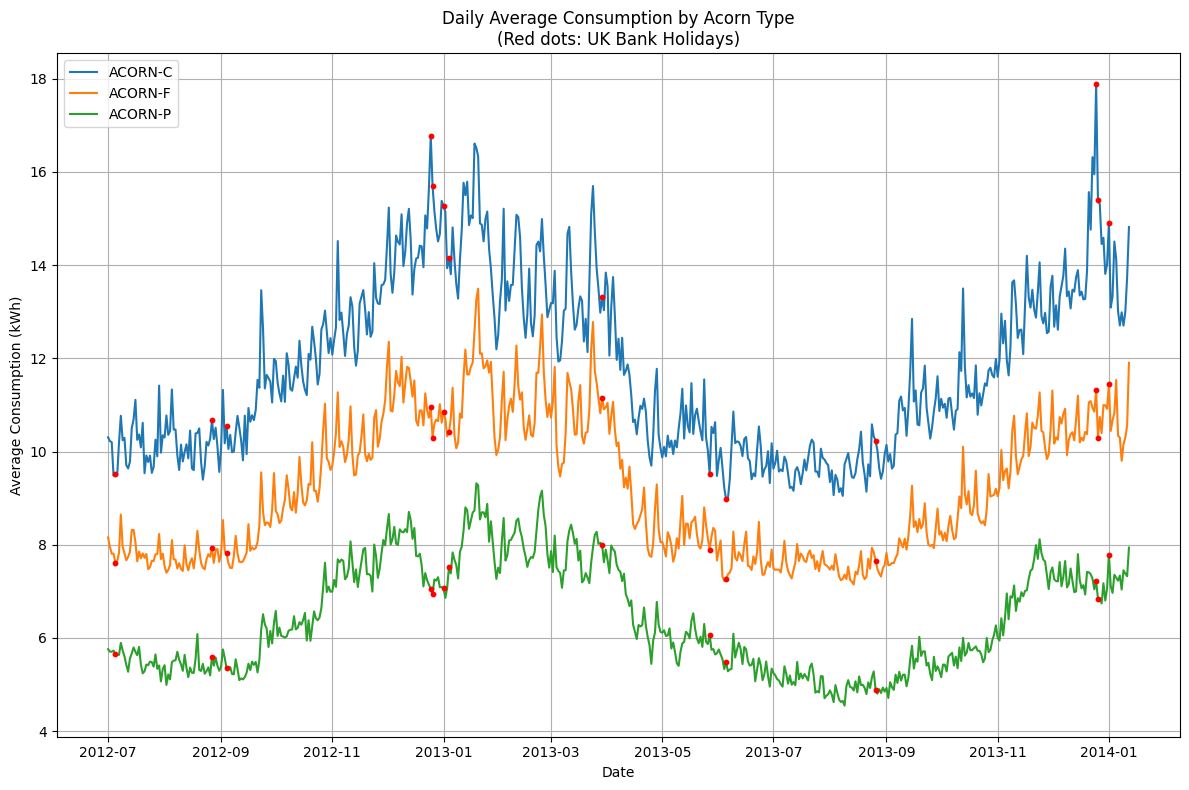

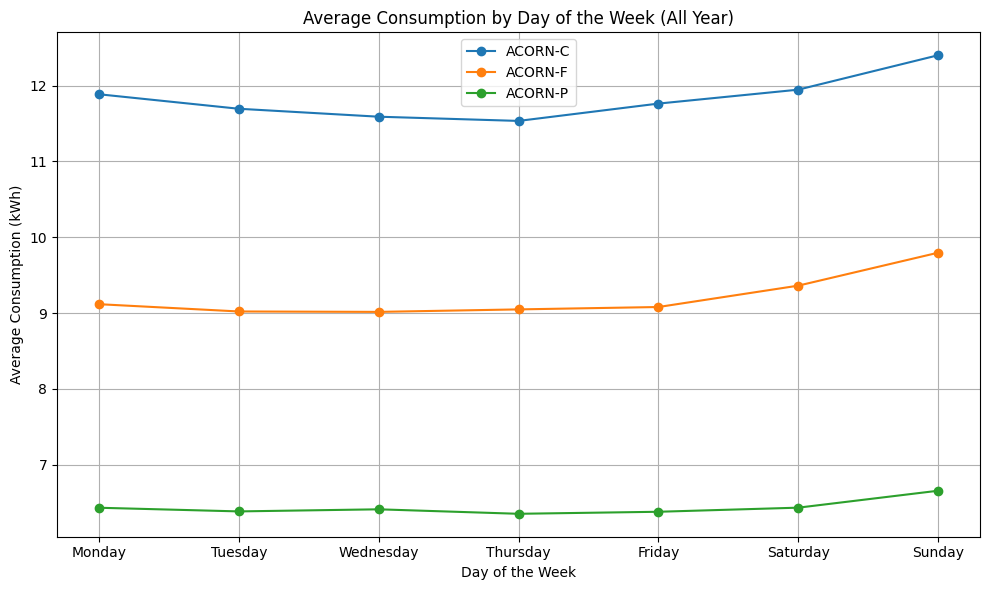

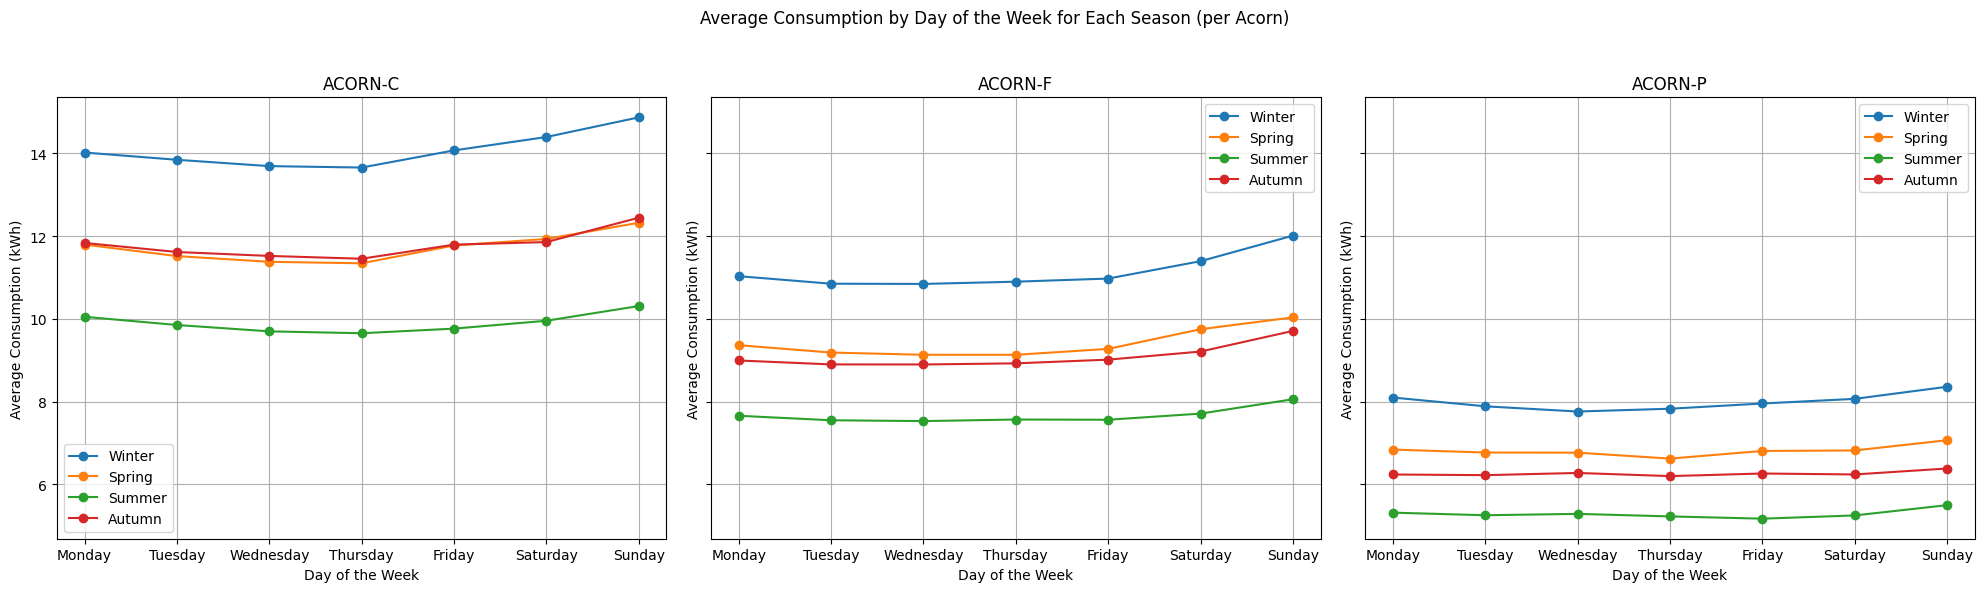

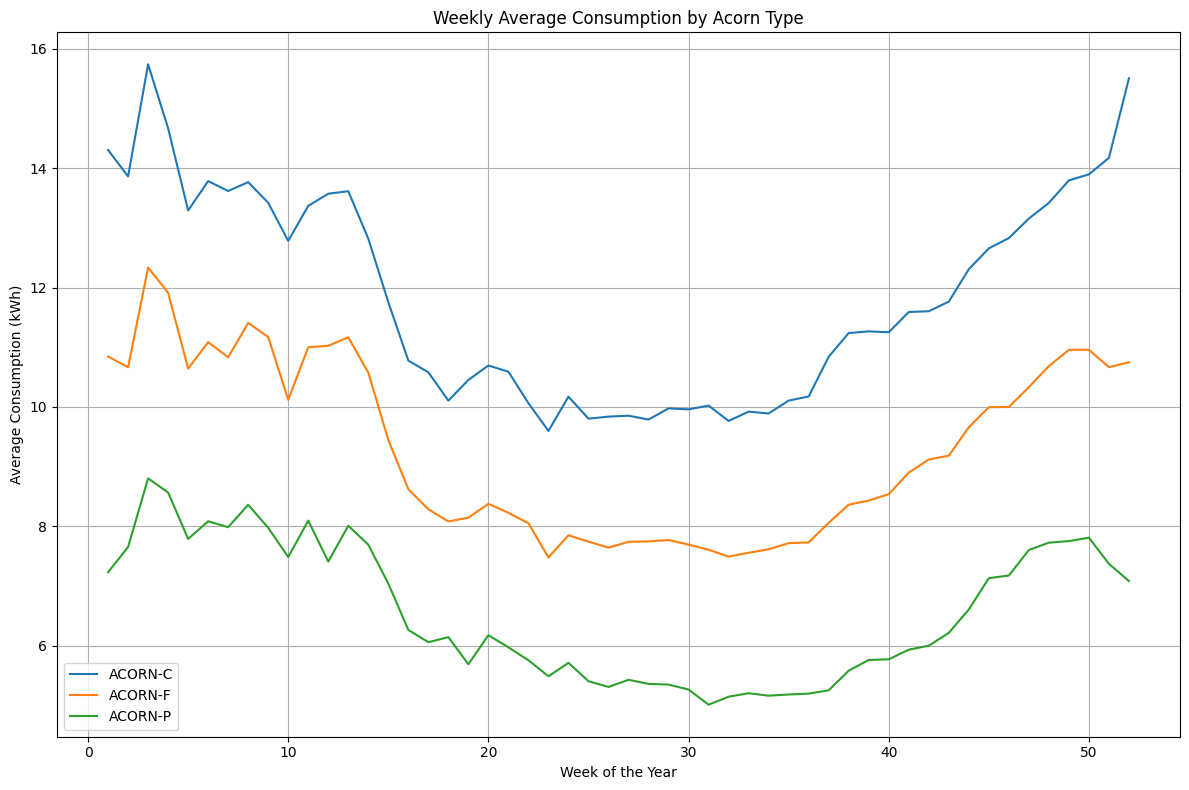

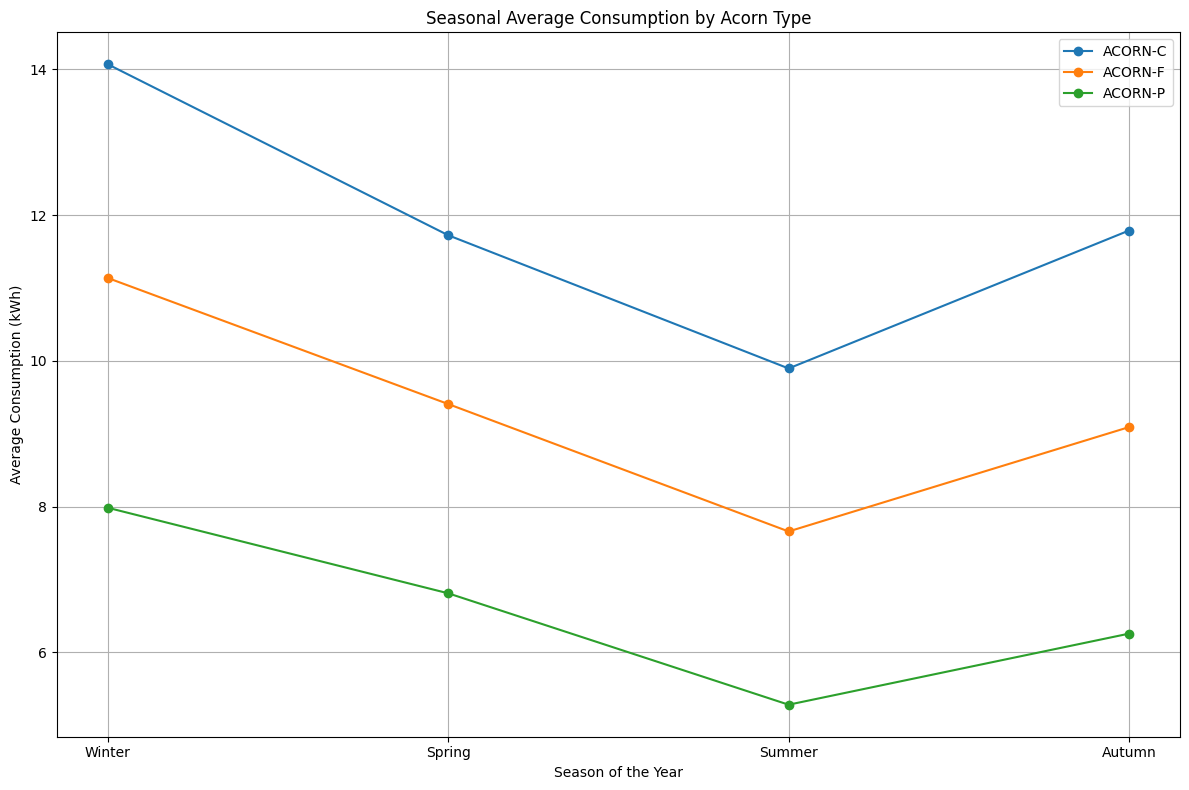

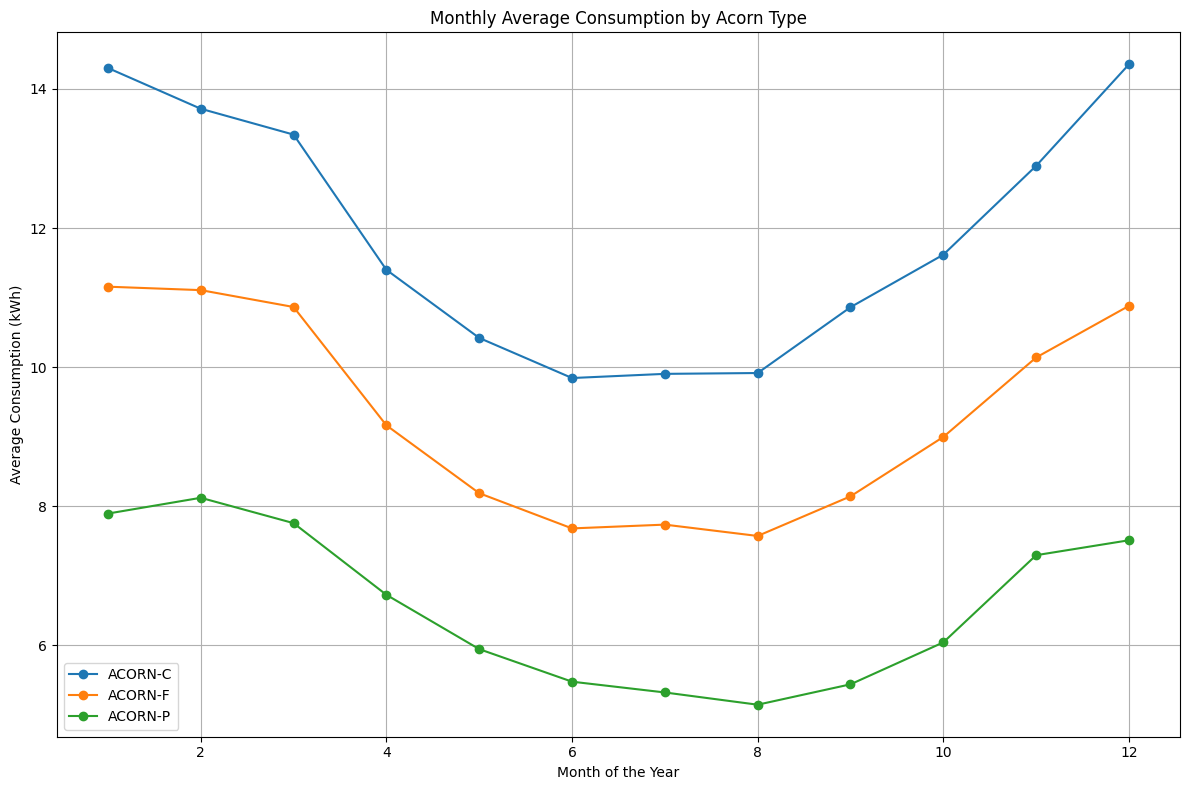

In [17]:
# Plot daily, weekly, monthly, and seasonal consumption for each Acorn group using the utility function
plot_daily_acorn_consumption(group_4_daily, uk_bank_holidays, acorn_types=['ACORN-C', 'ACORN-F', 'ACORN-P'])

Found holiday column: Bank holidays with 25 entries
Processed 25 valid bank holidays
Sample dates: [datetime.date(2014, 5, 5), datetime.date(2012, 5, 6), datetime.date(2014, 1, 1)]
Found 1 holidays matching the following dates: [Timestamp('2013-12-25 00:00:00')]
ACORN-C: Found 1 holiday outliers out of 1 total outliers


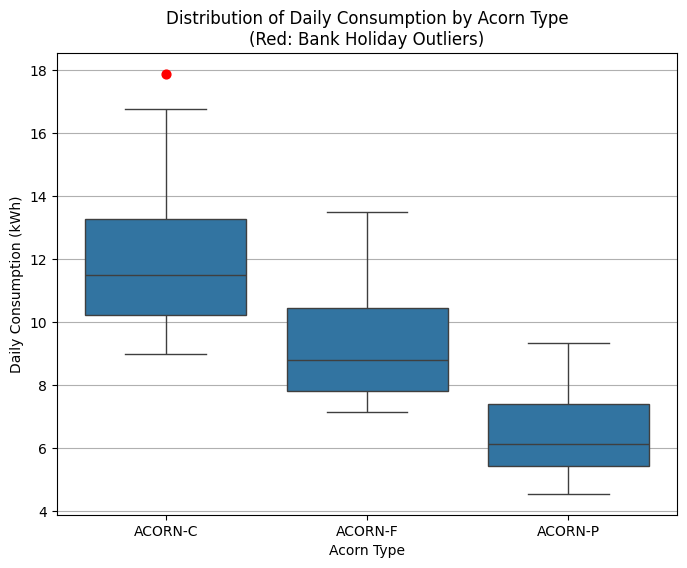

Found 1 holidays matching the following dates: [Timestamp('2013-12-25 00:00:00')]


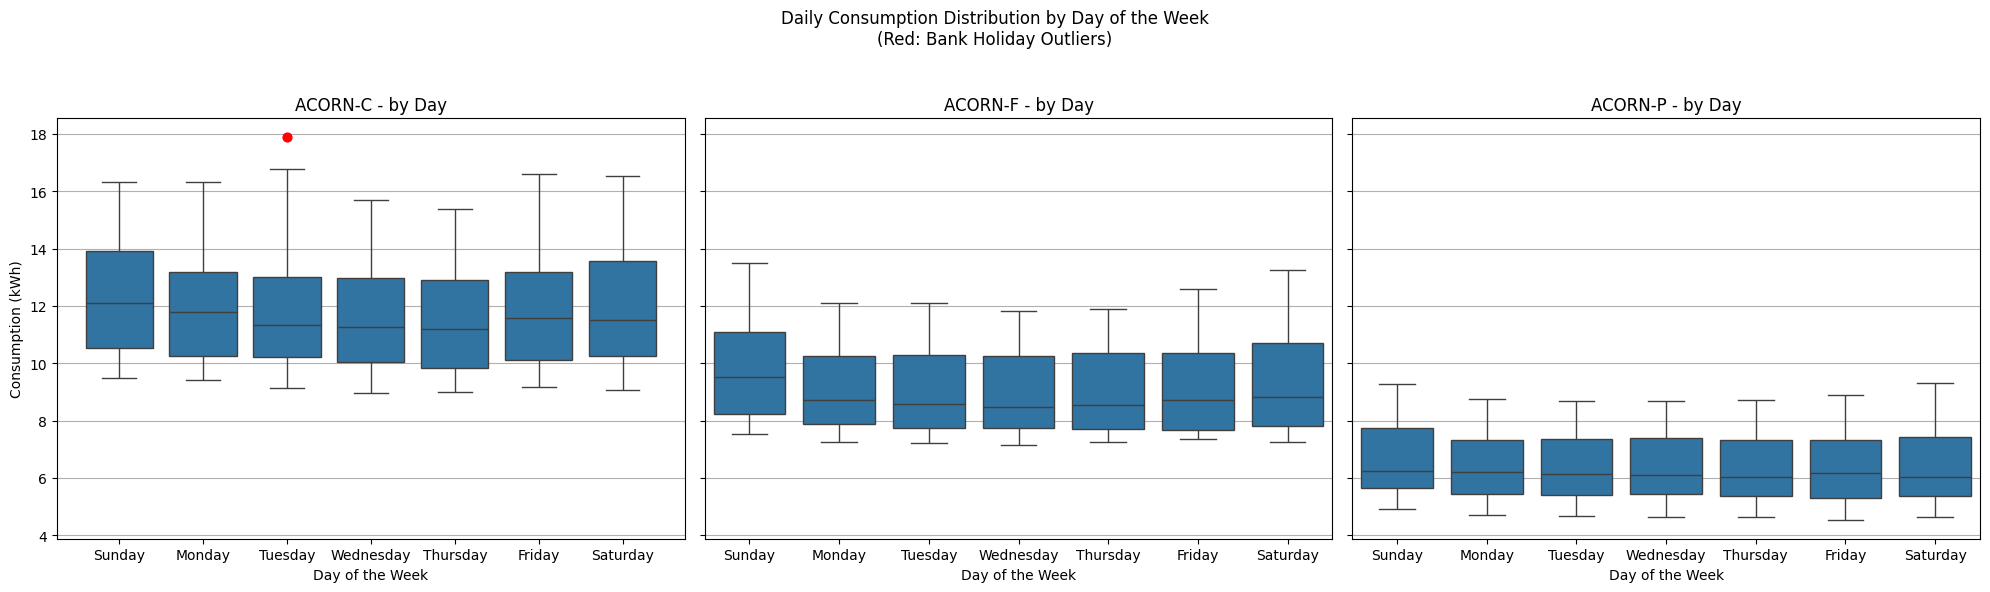

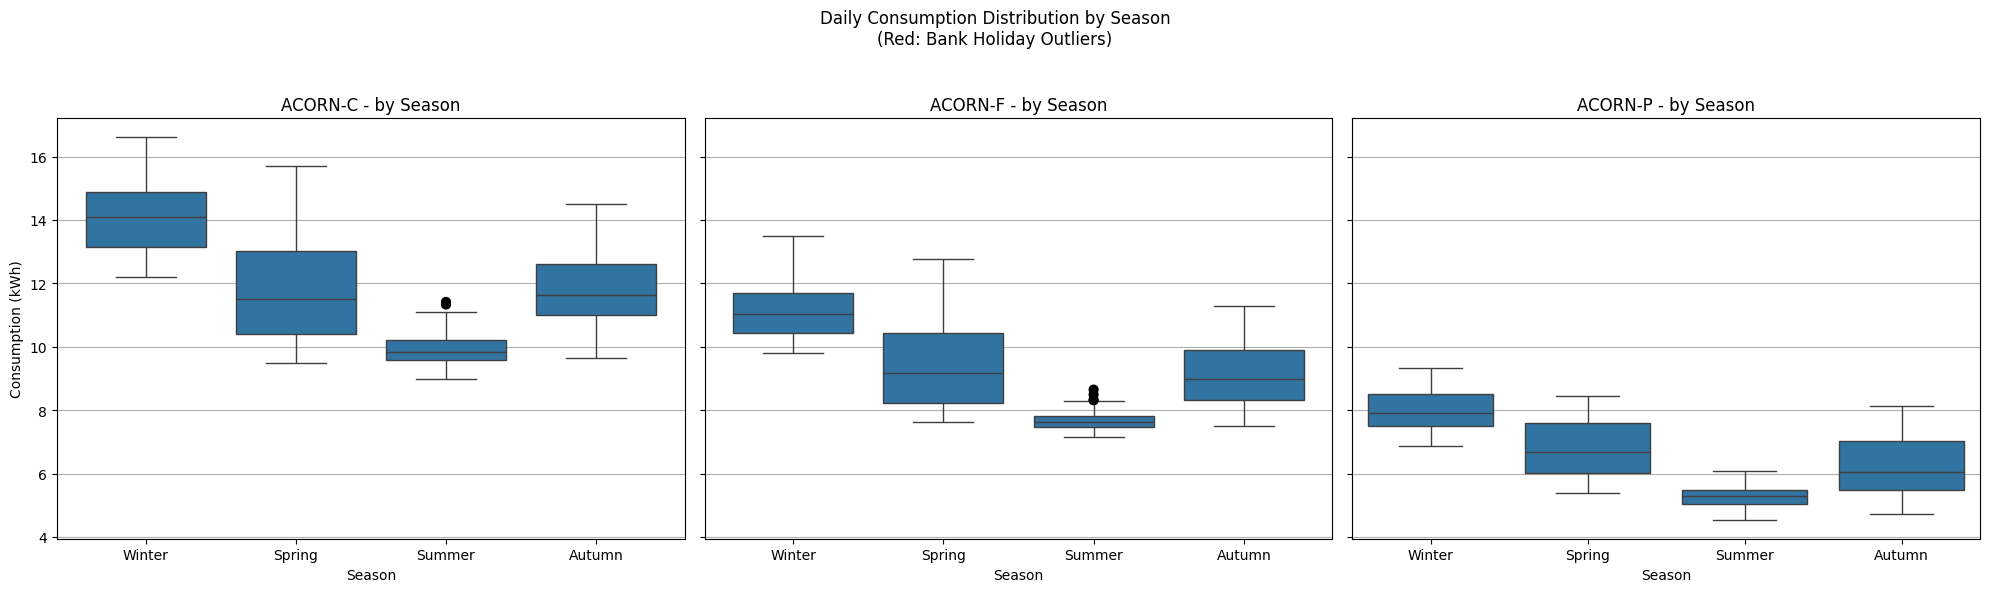

Found 1 holidays matching the following dates: [Timestamp('2013-12-25 00:00:00')]


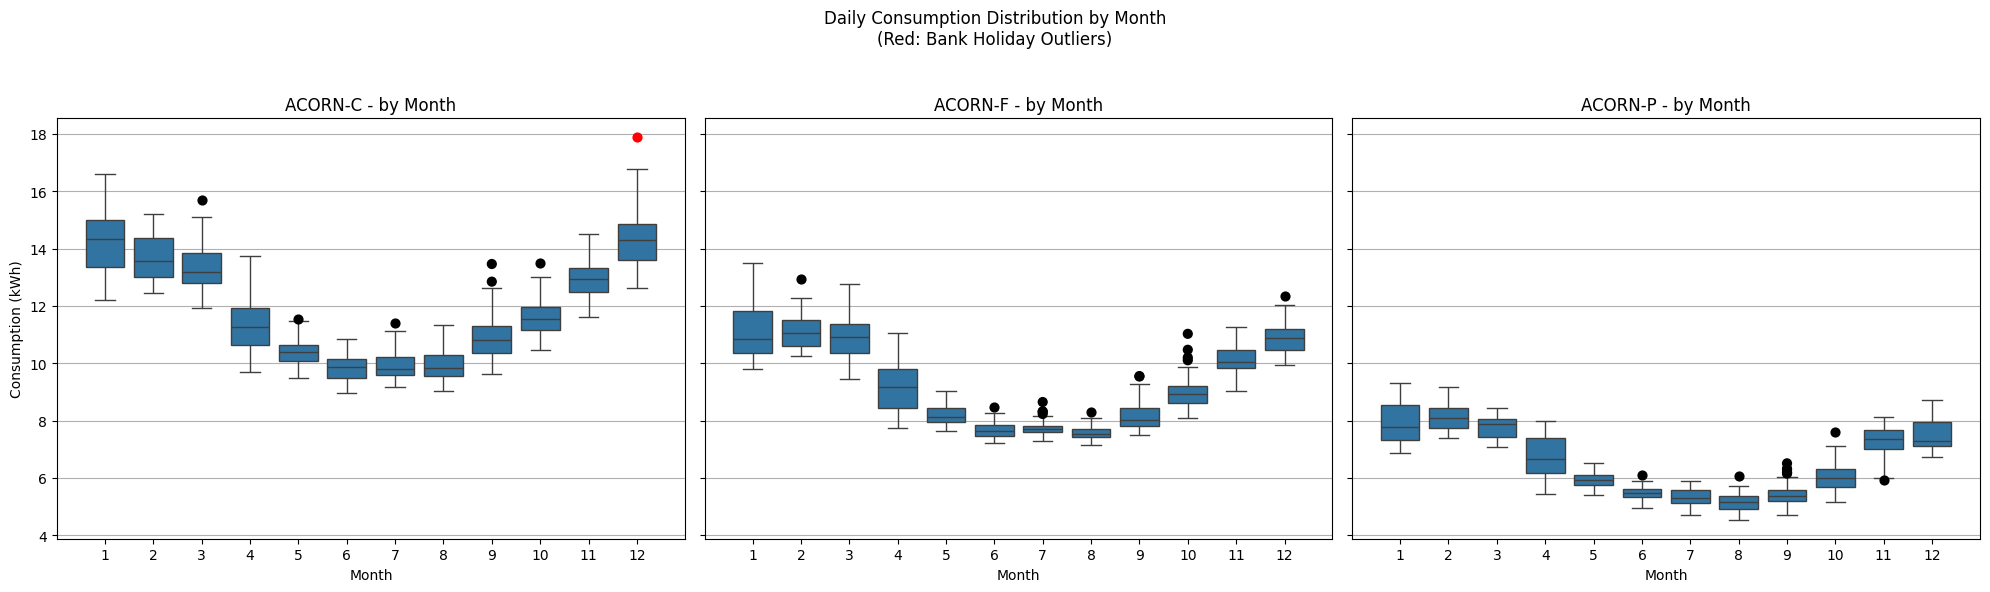

In [18]:
plot_daily_acorn_outlier_boxplots(group_4_daily, group_4_half_hourly['Acorn'], uk_bank_holidays)

# External Influence (Forecast)

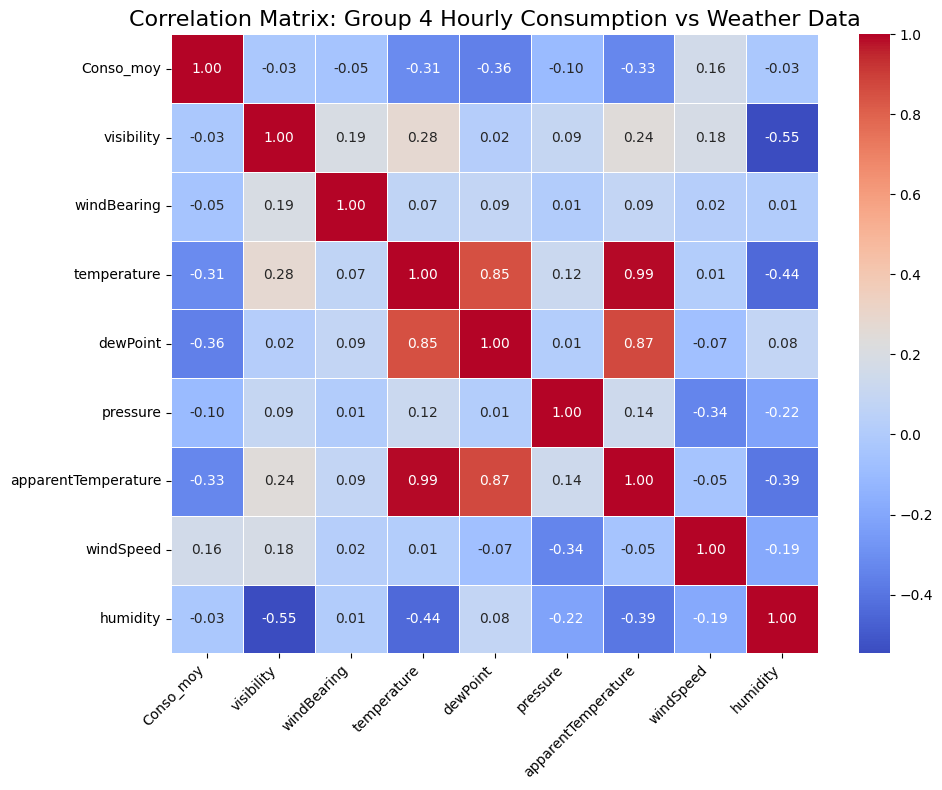

In [19]:
# Corr matrix

# Necessary data
weather_hourly = data['weather_hourly']
group_4_half_hourly = data['group_4_half_hourly']

# Reset index to make time a column if it's currently the index
if weather_hourly.index.name == 'time' or 'time' in str(weather_hourly.index.name):
    weather_hourly = weather_hourly.reset_index()

# Ensure datetime columns are properly formatted
if 'time' in weather_hourly.columns and not pd.api.types.is_datetime64_any_dtype(weather_hourly['time']):
    weather_hourly['time'] = pd.to_datetime(weather_hourly['time'])
elif 'DateTime' in weather_hourly.columns and not pd.api.types.is_datetime64_any_dtype(weather_hourly['DateTime']):
    weather_hourly['DateTime'] = pd.to_datetime(weather_hourly['DateTime'])

# Resample group_4_half_hourly to hourly frequency
group_4_hourly = group_4_half_hourly.set_index('DateTime').resample('h')['Conso_moy'].mean().reset_index()

# Determine the correct timestamp column in weather_hourly for merging
weather_time_col = 'time' if 'time' in weather_hourly.columns else 'DateTime'

# Merge with weather_hourly data
merged_data = pd.merge(group_4_hourly, weather_hourly, left_on='DateTime', right_on=weather_time_col, how='inner')

# Select numerical columns for correlation
columns_to_exclude = ['block_id', 'LCLid']
relevant_numeric_cols = [col for col in merged_data.select_dtypes(include=np.number).columns if col not in columns_to_exclude]
correlation_matrix = merged_data[relevant_numeric_cols].corr()

# Display the correlation matrix using a heatmap
plt.figure(figsize=(10, 8)) # Increased figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix: Group 4 Hourly Consumption vs Weather Data', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

## 1 · Instantaneous Relationships (no lag)

| Weather driver | Corr. with consumption | Reading |
|----------------|-----------------------|---------|
| Temperature / Apparent T° | **~ –0.31 / –0.33** | Moderate, negative |
| Dew-point      | –0.36 | Moderate, negative |
| Wind-speed     | +0.16 | Weak, positive |
| Visibility, Wind-bearing, Pressure, Humidity | ~0 | Essentially no linear link |

**Take-away:**  
*Higher outdoor temperatures (and thus higher dew-point / apparent-T°) tend to **reduce** demand; the effect is sizeable but not overwhelming.*
*Wind has a small opposite effect – when it is windier, people use slightly more energy (likely space-heating losses). Most other weather variables show negligible instantaneous influence.*

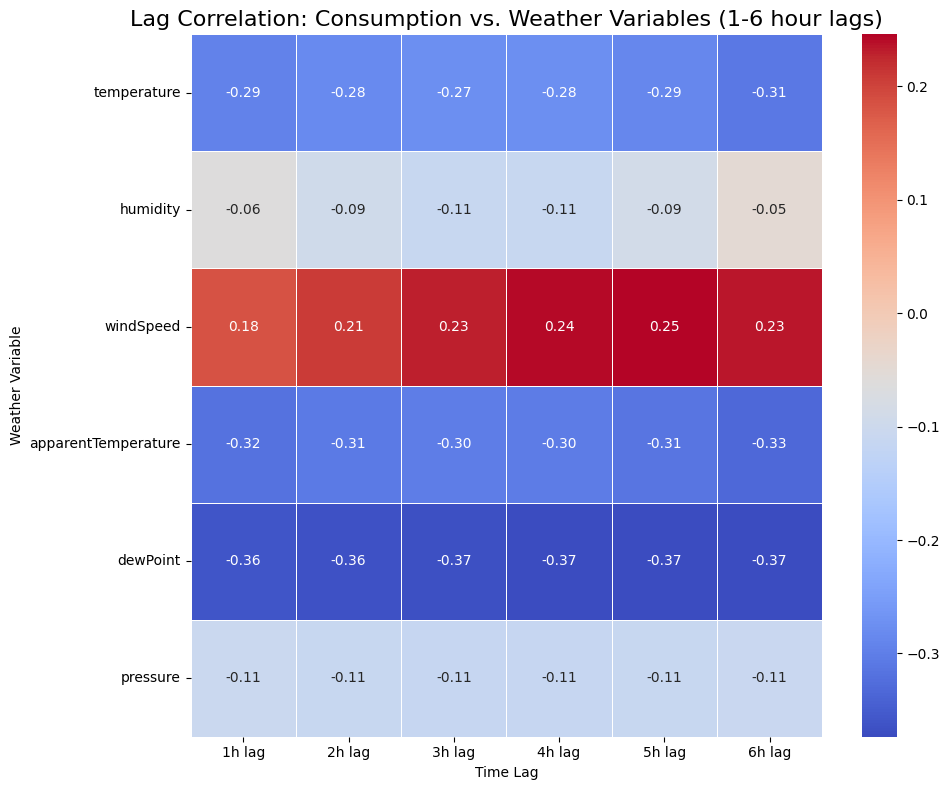

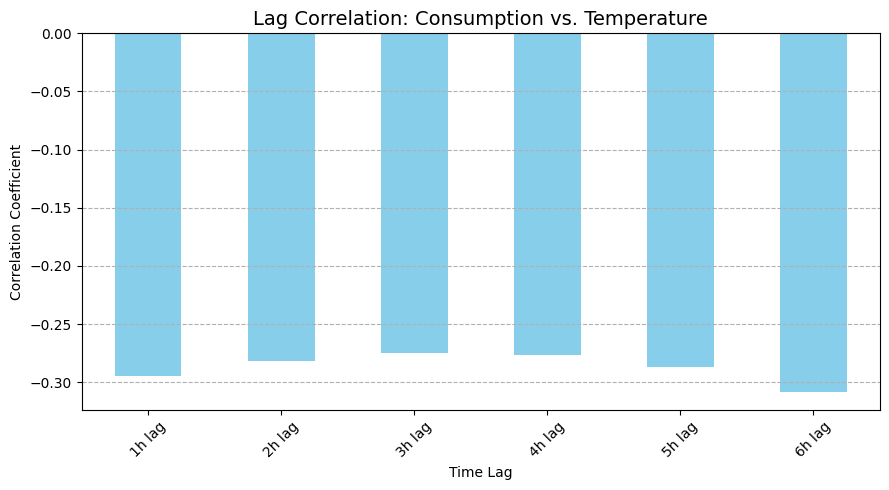

In [20]:
# Create merged_data_lag for lag analysis
merged_data_lag = merged_data.set_index('DateTime')

# Weather columns to lag
weather_cols_for_lag = ['temperature', 'humidity', 'windSpeed', 'apparentTemperature', 'dewPoint', 'pressure']

lag_periods = range(1, 7)  # Lags from 1 to 6 hours

lag_correlations = {}

for weather_col in weather_cols_for_lag:
    corrs = []
    for lag in lag_periods:
        lagged_col_name = f'{weather_col}_lag{lag}h'
        merged_data_lag[lagged_col_name] = merged_data_lag[weather_col].shift(lag)
        correlation = merged_data_lag['Conso_moy'].corr(merged_data_lag[lagged_col_name])
        corrs.append(correlation)
    lag_correlations[weather_col] = corrs

# Create a DataFrame for easier plotting
lag_corr_df = pd.DataFrame(lag_correlations, index=[f'{lag}h lag' for lag in lag_periods])

# Plotting the lag correlations
plt.figure(figsize=(10, 8))
sns.heatmap(lag_corr_df.T, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Lag Correlation: Consumption vs. Weather Variables (1-6 hour lags)', fontsize=16)
plt.ylabel('Weather Variable')
plt.xlabel('Time Lag')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot lag correlation for temperature
plt.figure(figsize=(9, 5))
lag_corr_df['temperature'].plot(kind='bar', color='skyblue')
plt.title('Lag Correlation: Consumption vs. Temperature', fontsize=14)
plt.ylabel('Correlation Coefficient')
plt.xlabel('Time Lag')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


## 2 · Short-Lag Effects (1-6 hours)

| Variable | 1 h-lag | 3 h-lag | 6 h-lag | Pattern |
|----------|---------|---------|---------|---------|
| Temperature | –0.29 | –0.27 | **–0.31** | Stable, slightly stronger again after 6 h |
| Apparent T° | –0.32 | –0.30 | –0.33 | Mirrors temperature |
| Dew-point   | –0.36 | –0.37 | –0.37 | Consistently strongest negative driver |
| Wind-speed  | +0.18 | +0.23 | **+0.23** | Small but growing positive effect, peaks ≈ 5 h |
| Humidity    | –0.06 | –0.11 | –0.05 | Very weak, noisy |
| Pressure    | –0.11 | –0.11 | –0.11 | Flat, weak negative |

**Take-away:** 

* The demand reaction to **temperature-related variables is immediate and lasts for several hours**; there is no evidence that the impact fades quickly.  
* **Wind-speed has its maximal influence about 4-5 h later**, hinting that wind-driven heat loss (or perceived cold) takes a few hours to translate into higher electricity use (thermostat response, occupant behaviour).  
* Other signals remain close to the noise floor.

Weather columns for long lag analysis: ['temperatureMax', 'temperatureMin', 'humidity', 'windSpeed', 'pressure', 'cloudCover', 'apparentTemperatureMax', 'apparentTemperatureMin']


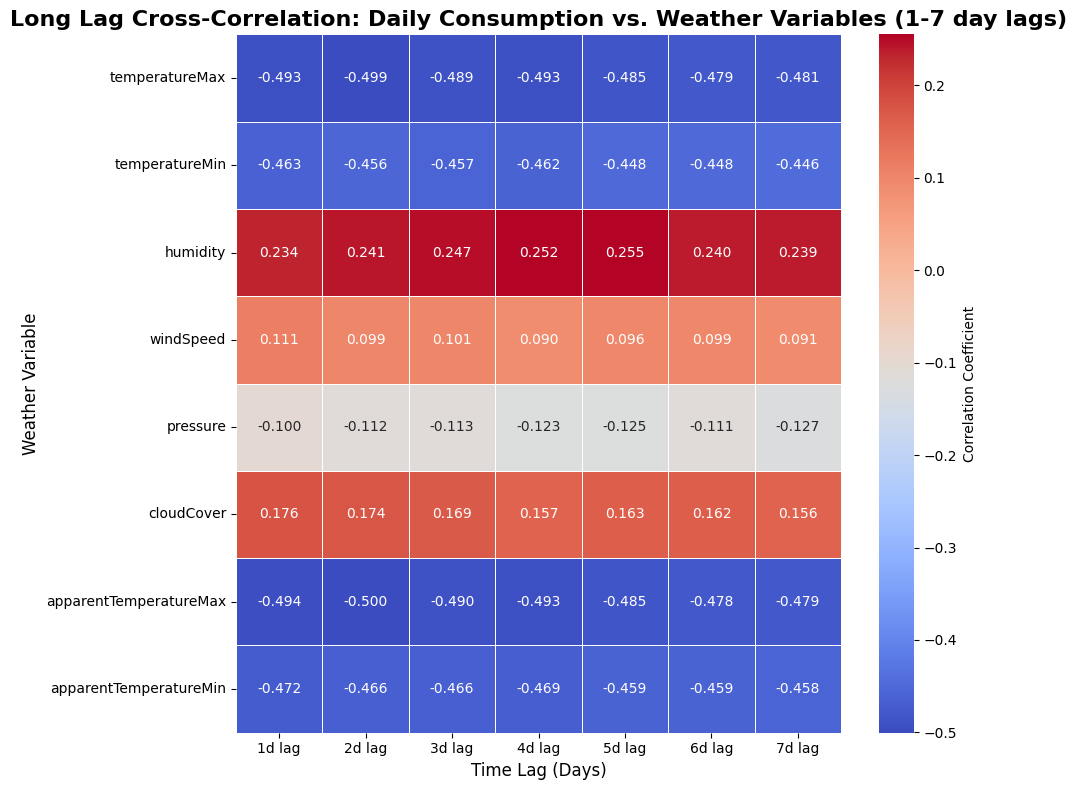

apparentTemperatureMax: -0.500 at 2d lag
temperatureMax: -0.499 at 2d lag
apparentTemperatureMin: -0.472 at 1d lag
temperatureMin: -0.463 at 1d lag
humidity: 0.255 at 5d lag


In [21]:
# Cross-correlation with Long Lags (1-7 days) using Daily Data

# Load daily datasets
group_4_daily_data = data['group_4_daily']
weather_daily_data = data['weather_daily']

# Reset index to make 'time' a column for merging
weather_daily_with_date = weather_daily_data.reset_index()
weather_daily_with_date['Date'] = pd.to_datetime(weather_daily_with_date['time']).dt.date

# Use utility to merge on date
merged_daily = merge_daily_consumption_weather(group_4_daily_data, weather_daily_with_date, consumption_date_col='Date', weather_date_col='Date')

# Find consumption column
def find_consumption_col(df):
    for col in df.columns:
        if 'conso' in col.lower() or 'consumption' in col.lower():
            return col
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    potential_cols = [col for col in numeric_cols if not any(x in col.lower() for x in ['temp', 'humid', 'wind', 'pressure', 'cloud'])]
    return potential_cols[0] if len(potential_cols) > 0 else numeric_cols[0]

consumption_col = find_consumption_col(merged_daily)

# Set Date as index for easier shifting
merged_daily_lag = merged_daily.set_index('Date').sort_index()

# Weather columns for long lag analysis
weather_cols_daily = ['temperatureMax', 'temperatureMin', 'humidity', 'windSpeed', 
                     'pressure', 'cloudCover', 'apparentTemperatureMax', 'apparentTemperatureMin']
weather_cols_daily = [col for col in weather_cols_daily if col in merged_daily_lag.columns]
if not weather_cols_daily:
    all_cols = merged_daily_lag.columns.tolist()
    weather_cols_daily = [col for col in all_cols if col != consumption_col and 
                         merged_daily_lag[col].dtype in ['float64', 'int64'] and
                         not any(x in col.lower() for x in ['acorn', 'id', 'block'])]
print(f"Weather columns for long lag analysis: {weather_cols_daily}")

# Long lag periods : 1-7 days
long_lag_periods = range(1, 8)
long_lag_correlations = {}

if consumption_col in merged_daily_lag.columns and weather_cols_daily:
    for weather_col in weather_cols_daily:
        corrs = []
        for lag in long_lag_periods:
            lagged_col_name = f'{weather_col}_lag{lag}d'
            merged_daily_lag[lagged_col_name] = merged_daily_lag[weather_col].shift(lag)
            correlation = merged_daily_lag[consumption_col].corr(merged_daily_lag[lagged_col_name])
            if pd.isna(correlation):
                correlation = 0.0
            corrs.append(correlation)
        long_lag_correlations[weather_col] = corrs
    long_lag_corr_df = pd.DataFrame(long_lag_correlations, index=[f'{lag}d lag' for lag in long_lag_periods])
    if not long_lag_corr_df.empty:
        plt.figure(figsize=(10, 8))
        sns.heatmap(long_lag_corr_df.T, annot=True, cmap='coolwarm', fmt=".3f", linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})
        plt.title('Long Lag Cross-Correlation: Daily Consumption vs. Weather Variables (1-7 day lags)', fontsize=16, fontweight='bold')
        plt.ylabel('Weather Variable', fontsize=12)
        plt.xlabel('Time Lag (Days)', fontsize=12)
        plt.xticks(rotation=0)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
        max_corrs = long_lag_corr_df.abs().max()
        max_corrs_cleaned = max_corrs.dropna()
        if not max_corrs_cleaned.empty:
            max_corrs_sorted = max_corrs_cleaned.sort_values(ascending=False)
            for var, corr in max_corrs_sorted.head(5).items():
                best_lag_idx = long_lag_corr_df[var].abs().idxmax()
                best_corr = long_lag_corr_df.loc[best_lag_idx, var]
                print(f"{var}: {best_corr:.3f} at {best_lag_idx}")
        else:
            print("No valid correlations found.")
    else:
        print("Long lag correlation DataFrame is empty.")
else:
    if consumption_col not in merged_daily_lag.columns:
        print(f"Error: Consumption column '{consumption_col}' not found in merged daily data.")
    if not weather_cols_daily:
        print("Error: No weather columns available for analysis.")

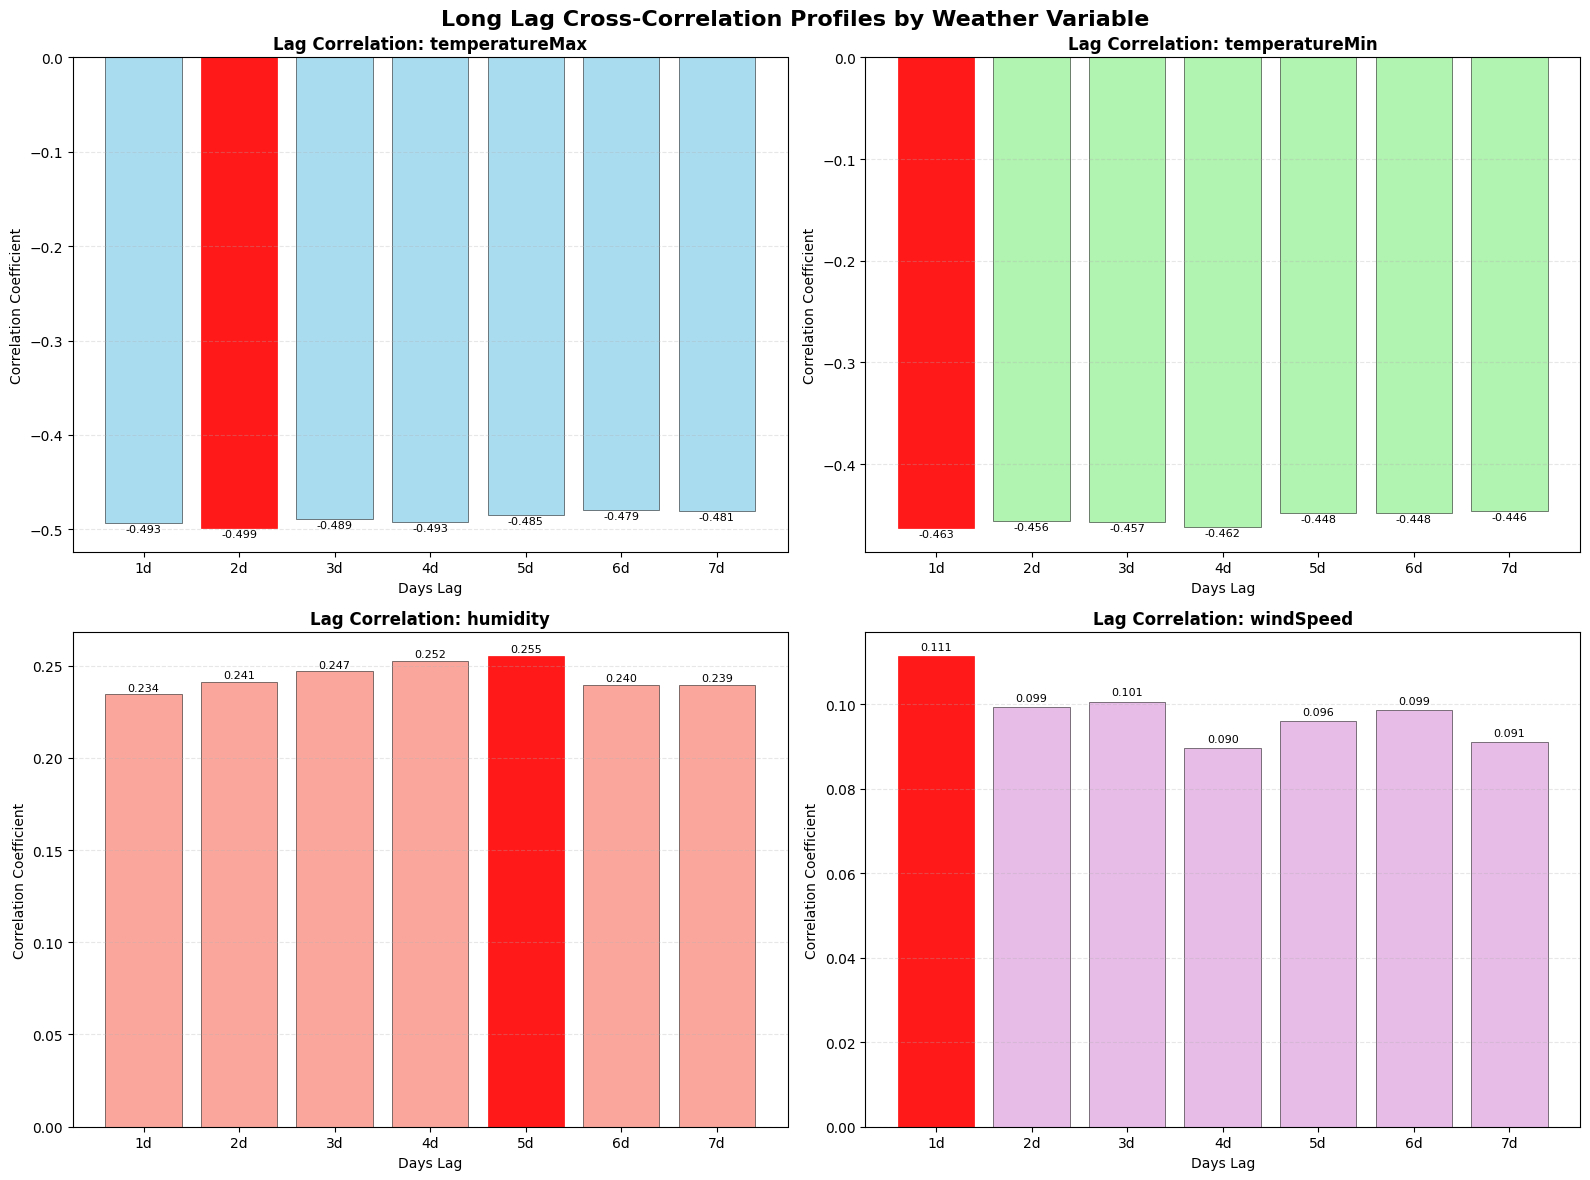


=== LONG LAG CORRELATION SUMMARY ===
Analysis period: 2012-07-01 to 2014-01-12
Total daily observations: 1677
Weather variables analyzed: 8

Correlation distribution (56 total):
Strong: 0 (0.0%)
Moderate: 28 (50.0%)
Weak: 23 (41.1%)
Negligible: 5 (8.9%)


In [22]:
# Detailed Analysis of Specific Weather Variables

if not long_lag_corr_df.empty and len(weather_cols_daily) > 0:
    # Plot individual lag correlation profiles for key variables
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    # Select up to 4 weather variables for detailed plotting
    vars_to_plot = weather_cols_daily[:4]
    colors = ['skyblue', 'lightgreen', 'salmon', 'plum']
    
    for i, weather_var in enumerate(vars_to_plot):
        if i < len(axes) and weather_var in long_lag_corr_df.columns:
            ax = axes[i]
            correlations = long_lag_corr_df[weather_var]
            
            # Bar plot
            bars = ax.bar(range(len(correlations)), correlations.values, 
                         color=colors[i], alpha=0.7, edgecolor='black', linewidth=0.5)
            
            # Highlight strongest correlation
            max_idx = np.abs(correlations.values).argmax()
            bars[max_idx].set_color('red')
            bars[max_idx].set_alpha(0.9)
            
            ax.set_title(f'Lag Correlation: {weather_var}', fontsize=12, fontweight='bold')
            ax.set_xlabel('Days Lag', fontsize=10)
            ax.set_ylabel('Correlation Coefficient', fontsize=10)
            ax.set_xticks(range(len(correlations)))
            ax.set_xticklabels([f'{lag}d' for lag in long_lag_periods])
            ax.grid(axis='y', linestyle='--', alpha=0.3)
            ax.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
            
            # Add value labels on bars
            for j, bar in enumerate(bars):
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + 0.001 * np.sign(height),
                       f'{height:.3f}', ha='center', va='bottom' if height > 0 else 'top',
                       fontsize=8)
    
    # Hide unused subplots
    for i in range(len(vars_to_plot), len(axes)):
        axes[i].set_visible(False)
    
    plt.suptitle('Long Lag Cross-Correlation Profiles by Weather Variable', 
                fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.show()
    
    # Summary statistics
    print("\n=== LONG LAG CORRELATION SUMMARY ===")
    print(f"Analysis period: {merged_daily_lag.index.min()} to {merged_daily_lag.index.max()}")
    print(f"Total daily observations: {len(merged_daily_lag)}")
    print(f"Weather variables analyzed: {len(weather_cols_daily)}")
    
    # Categorize correlations
    all_corrs = long_lag_corr_df.values.flatten()
    all_corrs = all_corrs[~np.isnan(all_corrs)]
    
    strong = np.sum(np.abs(all_corrs) > 0.7)
    moderate = np.sum((np.abs(all_corrs) > 0.3) & (np.abs(all_corrs) <= 0.7))
    weak = np.sum((np.abs(all_corrs) > 0.1) & (np.abs(all_corrs) <= 0.3))
    negligible = np.sum(np.abs(all_corrs) <= 0.1)
    
    total = len(all_corrs)
    print(f"\nCorrelation distribution ({total} total):")
    print(f"Strong: {strong} ({strong/total*100:.1f}%)")
    print(f"Moderate: {moderate} ({moderate/total*100:.1f}%)")
    print(f"Weak: {weak} ({weak/total*100:.1f}%)")
    print(f"Negligible: {negligible} ({negligible/total*100:.1f}%)")
else:
    print("Unable to perform detailed analysis - insufficient data or weather variables.")

## 3 · Long-Lag (1-7 days) Cross-Correlations

| Weather driver | Peak lag & sign | Strength | Comment |
|----------------|-----------------|----------|---------|
| **Max temperature** | **2 days, –0.499** | Strong | Cooler spells lift demand for ~a week. |
| Min temperature | 1 day, –0.463 | Strong | Similar but slightly weaker. |
| Apparent T° (max/min) | 2 days, –0.50 | Strong | Mirrors physical temperature. |
| **Humidity** | 5 days, +0.255 | Moderate | More humid periods coincide with higher consumption a few days later (possible proxy for rainy/cloudy weather --> indoor lighting / heating). |
| Cloud-cover | 1–7 days, +0.16-0.18 | Weak-to-moderate | Same intuition as humidity. |
| Wind-speed | 1 day, +0.111 | Weak | Daily average effect is modest. |
| Pressure | 5-7 days, –0.125 | Weak | Low-pressure systems (bad weather) slightly increase demand. |

**Take-away:**

* **Temperature is the dominant long-range predictor**: a cold snap drives up electricity use for several consecutive days.  
* **Humidity and cloud-cover show the opposite sign** (positive): dull, damp weather tends to keep people indoors with lights/heating on.  
* **Wind and pressure matter, but only marginally** once we aggregate to daily totals.

---

## 4 · Putting It All Together

1. **Heating-dominated profile** – The consistently **negative temperature correlations** (hourly and daily) imply that electricity demand rises as the air gets colder, typical of a heating-centric load (electric radiators, heat pumps or resistive heaters).  
2. **Lag behaviour** – Immediate (0–1 h) and sustained (up to 6 h and multiple days) effects indicate that both quick thermostat responses and prolonged cold spells shape consumption patterns.  
3. **Weather system influence** – Positive links with humidity/cloud-cover and small negatives with pressure show that *broader weather regimes* (e.g., overcast, low-pressure systems) also raise demand, independent of raw temperature.  
4. **Wind sensitivity** – Although weaker than temperature, wind contributes a **small incremental load**; design of energy-efficiency measures should consider infiltration and draught proofing.
5. **Recap of the interpretation of correlation** - Strong: $|r| > 0.7$, Moderate: $0.3 < |r| ≤ 0.7$, Weak: $0.1 < |r| ≤ 0.3$, Negligible: $|r| ≤ 0.1$